# Compare vaccination strategies. $e$=0.7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import datetime
from experiments import get_experiments_results
from env_var import EPIDEMIC, MAPPINGS, EXPERIMENTS

mpl.rcParams['figure.dpi']= 175
plt.style.use('ggplot')

In [2]:
# Simulation parameters
num_age_groups = EXPERIMENTS['num_age_groups']
num_ervas = EXPERIMENTS['num_ervas']
T = EXPERIMENTS['simulate_T']
init_vacc = EXPERIMENTS['init_vacc']
inc_mob = False
u = EXPERIMENTS['vaccines_per_day']
r_experiments = EXPERIMENTS['r_effs']
t0 = EXPERIMENTS['t0']
e = EPIDEMIC['e']
strategies = EXPERIMENTS['strategies']

# Plot parameters
plot_interval = 15
ervas_labels = EPIDEMIC['ervas_order']
age_labels = MAPPINGS['age_groups'][num_age_groups]['names']
color_palette = ["#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", "#999999"]

In [3]:
all_results = get_experiments_results(num_age_groups=num_age_groups,
                                      num_ervas=num_ervas,
                                      init_vacc=init_vacc,
                                      strategies=strategies,
                                      u=u,
                                      T=T,
                                      r_experiments=r_experiments,
                                      t0=t0,
                                      e=e,
                                      inc_mob=inc_mob)

Beginning experiments.
Parameters:
Number of age ervas: 5.
Number of age groups: 9.
Number of vaccines per day: 30000.
rho: 44.42587259209647.
t0: 2021-04-18.
T: 115.
Vaccine efficacy (e): 0.7.
Rs to try: [0.75, 1.0, 1.25, 1.5, 2.0].
Initialize with vaccinated people: True.
Include mobility: False.
Strategies:
[([1, 0, 0], 'Pop only'), ([0, 0, 0], 'No vaccination'), ([0.3333333333333333, 0.3333333333333333, 0.3333333333333333], 'Pop, Inf and Hosp'), ([0.5, 0, 0.5], 'Pop and Hosp'), ([0.5, 0.5, 0], 'Pop and Inf'), ([0, 0.5, 0.5], 'Hosp and Inf'), ([0, 0, 1], 'Hosp only'), ([0, 1, 0], 'Inf only'), (None, 'Optimal')].

Finished R: 0.75. Beta: 0.016882054448007125 1/5. Policy: Pop only. 1/9
Finished R: 0.75. Beta: 0.016882054448007125 1/5. Policy: No vaccination. 2/9
Finished R: 0.75. Beta: 0.016882054448007125 1/5. Policy: Pop, Inf and Hosp. 3/9
Finished R: 0.75. Beta: 0.016882054448007125 1/5. Policy: Pop and Hosp. 4/9
Finished R: 0.75. Beta: 0.016882054448007125 1/5. Policy: Pop and Inf

In [4]:
def plot_results(ax, r, metric, all_results, t0, T, skip_no_vacc=True):
    begin = datetime.datetime.strptime(t0, '%Y-%m-%d')
    x = [begin + datetime.timedelta(days=day) for day in range(T)]

    results_for_r = all_results[r]
    totals = []
    label_i = 0
    for label, results_all_metrics in results_for_r:
        if label == 'No vaccination' and skip_no_vacc:
            continue
        metric_results = results_all_metrics[metric]
        metric_all_time = metric_results.sum(axis=0)
        metric_all_time = metric_all_time.sum(axis=0)
        
        assert metric_all_time.shape[0] == T
        
        ax.plot(x, metric_all_time, label=label, color=color_palette[label_i])
        if metric == 'deaths':
            total_policy = metric_all_time[-1]
        else:
            total_policy = metric_all_time.sum(axis=0)
        total = (label, total_policy)
        totals.append(total)
        label_i += 1
        
    sorted_totals = sorted(totals, key=lambda x: x[-1])
    for total in sorted_totals:
        print('%s: %s' % (total[0], total[1]))
        
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of %s.' % (metric, ))
    ax.set_title('Number of %s per policy. R=%s' % (metric, r))
    ax.legend()
        
    return ax

# Deaths

Inf only: 97.41175014370452
Hosp and Inf: 97.42820406655606
Hosp only: 97.45190376118454
Pop, Inf and Hosp: 97.49530161980542
Optimal: 97.52413986884909
Pop and Inf: 97.53028920783227
Pop and Hosp: 97.5526938449497
Pop only: 97.72247575239618


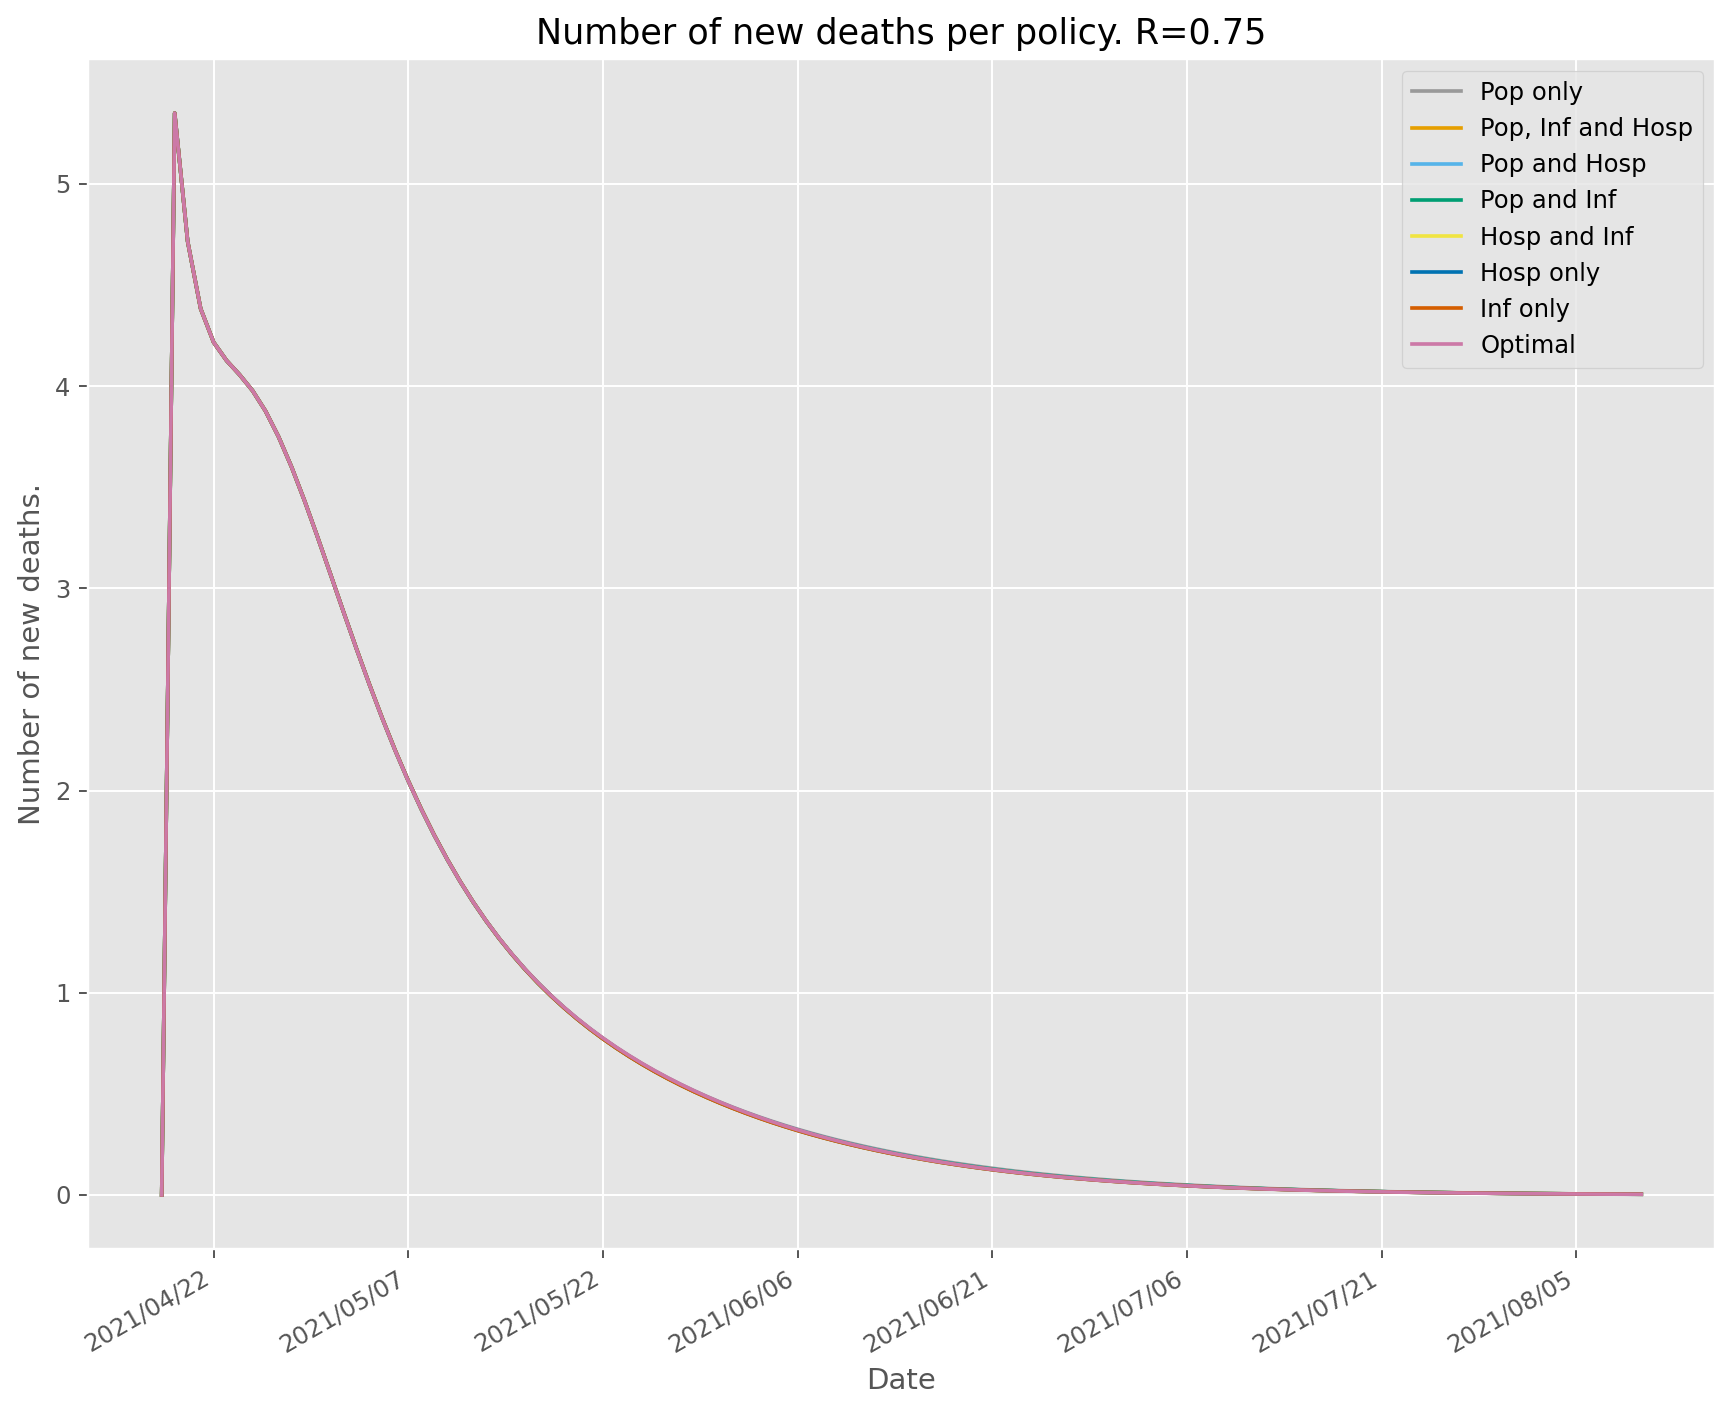

In [5]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='new deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Inf only: 155.92990369401826
Hosp and Inf: 156.08119520358903
Optimal: 156.22537414236322
Hosp only: 156.25514103190417
Pop, Inf and Hosp: 156.42454515670545
Pop and Inf: 156.6201113595136
Pop and Hosp: 156.7770017861133
Pop only: 158.03055757322872


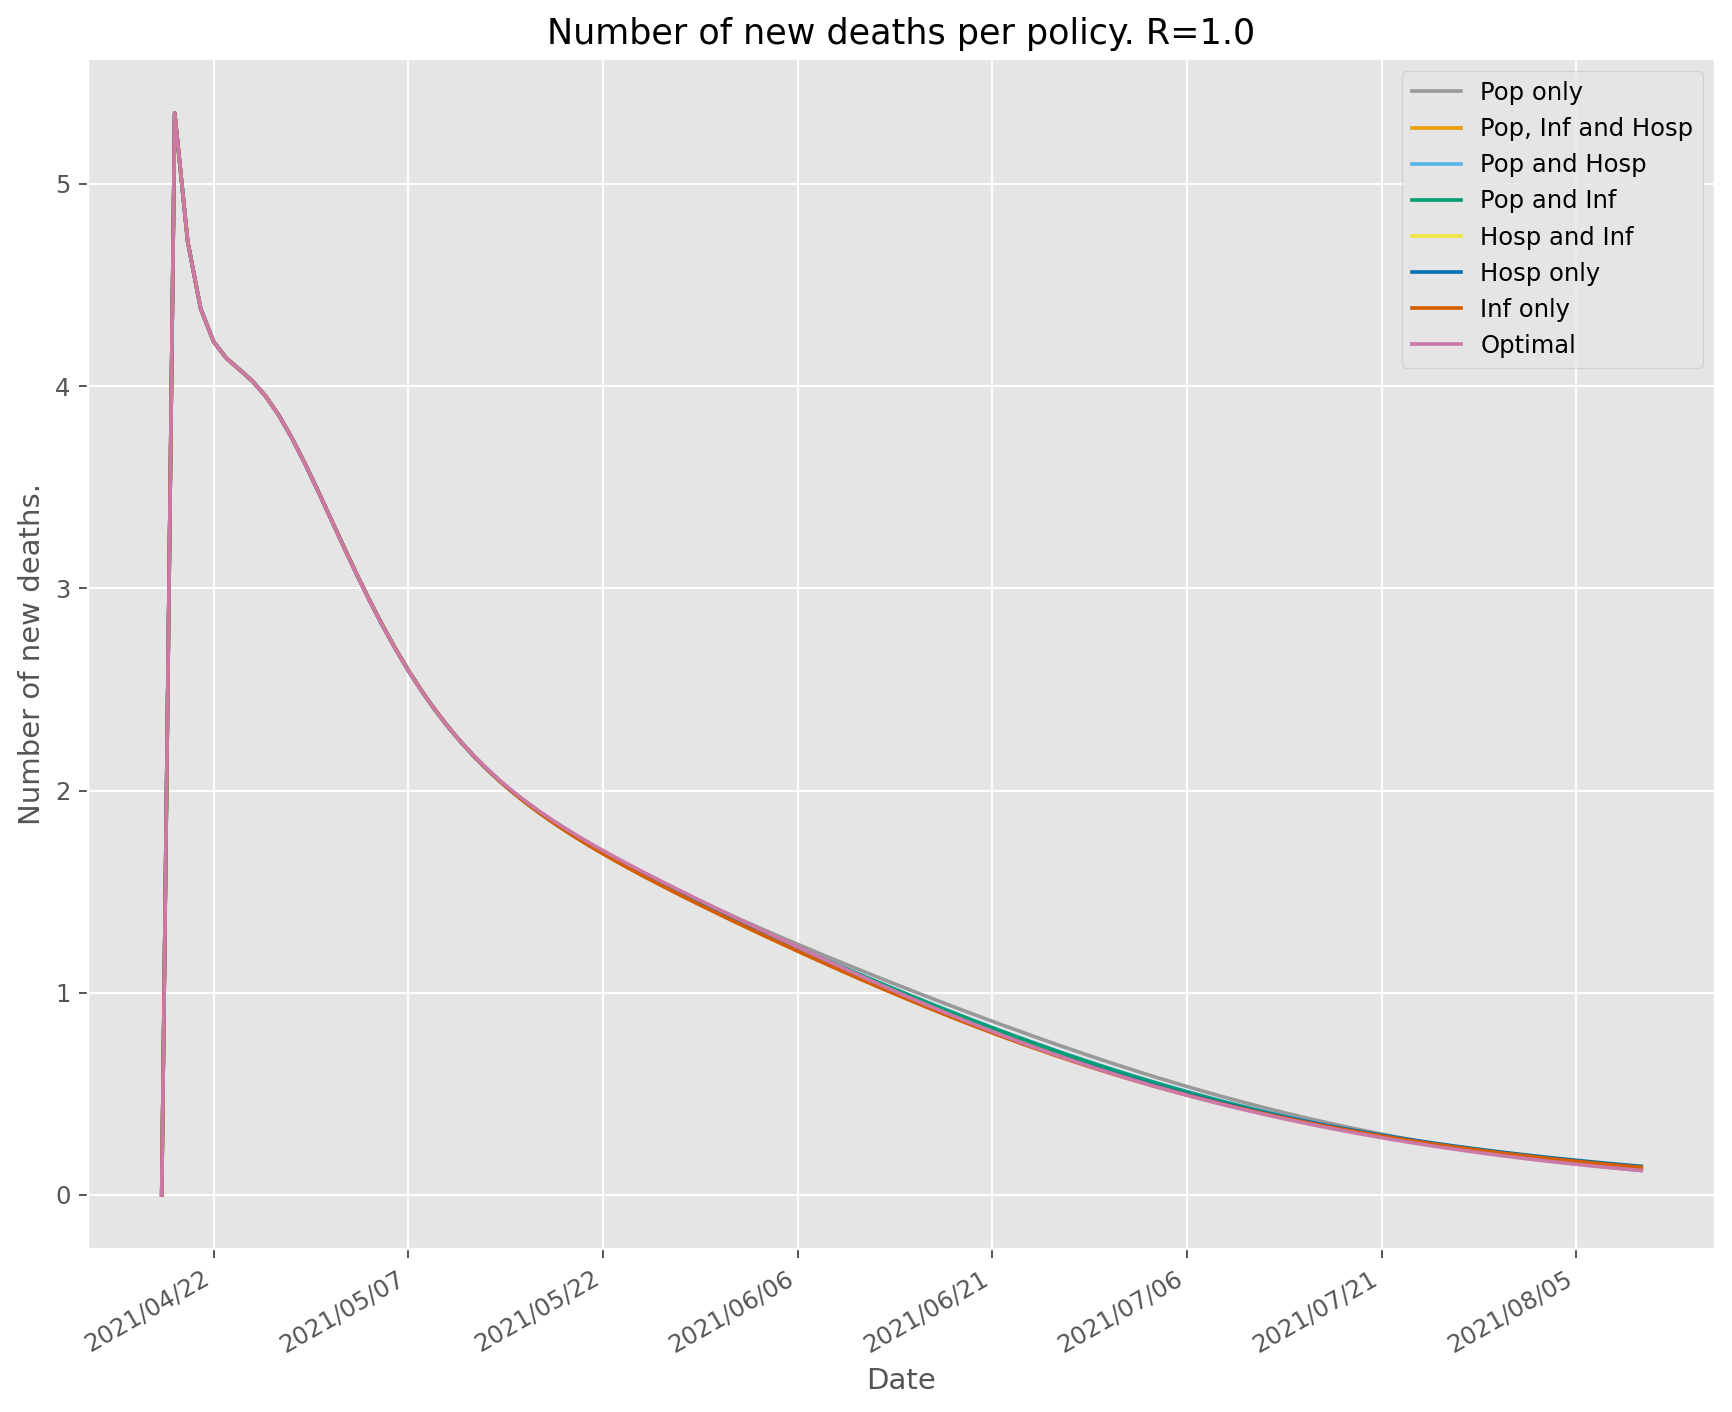

In [6]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='new deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Optimal: 416.32256578460834
Pop and Inf: 421.07346604174876
Pop, Inf and Hosp: 422.11500037624006
Pop and Hosp: 422.53985662993176
Inf only: 422.722385706401
Hosp and Inf: 424.3128793234504
Hosp only: 426.0482510320206
Pop only: 426.66277855668903


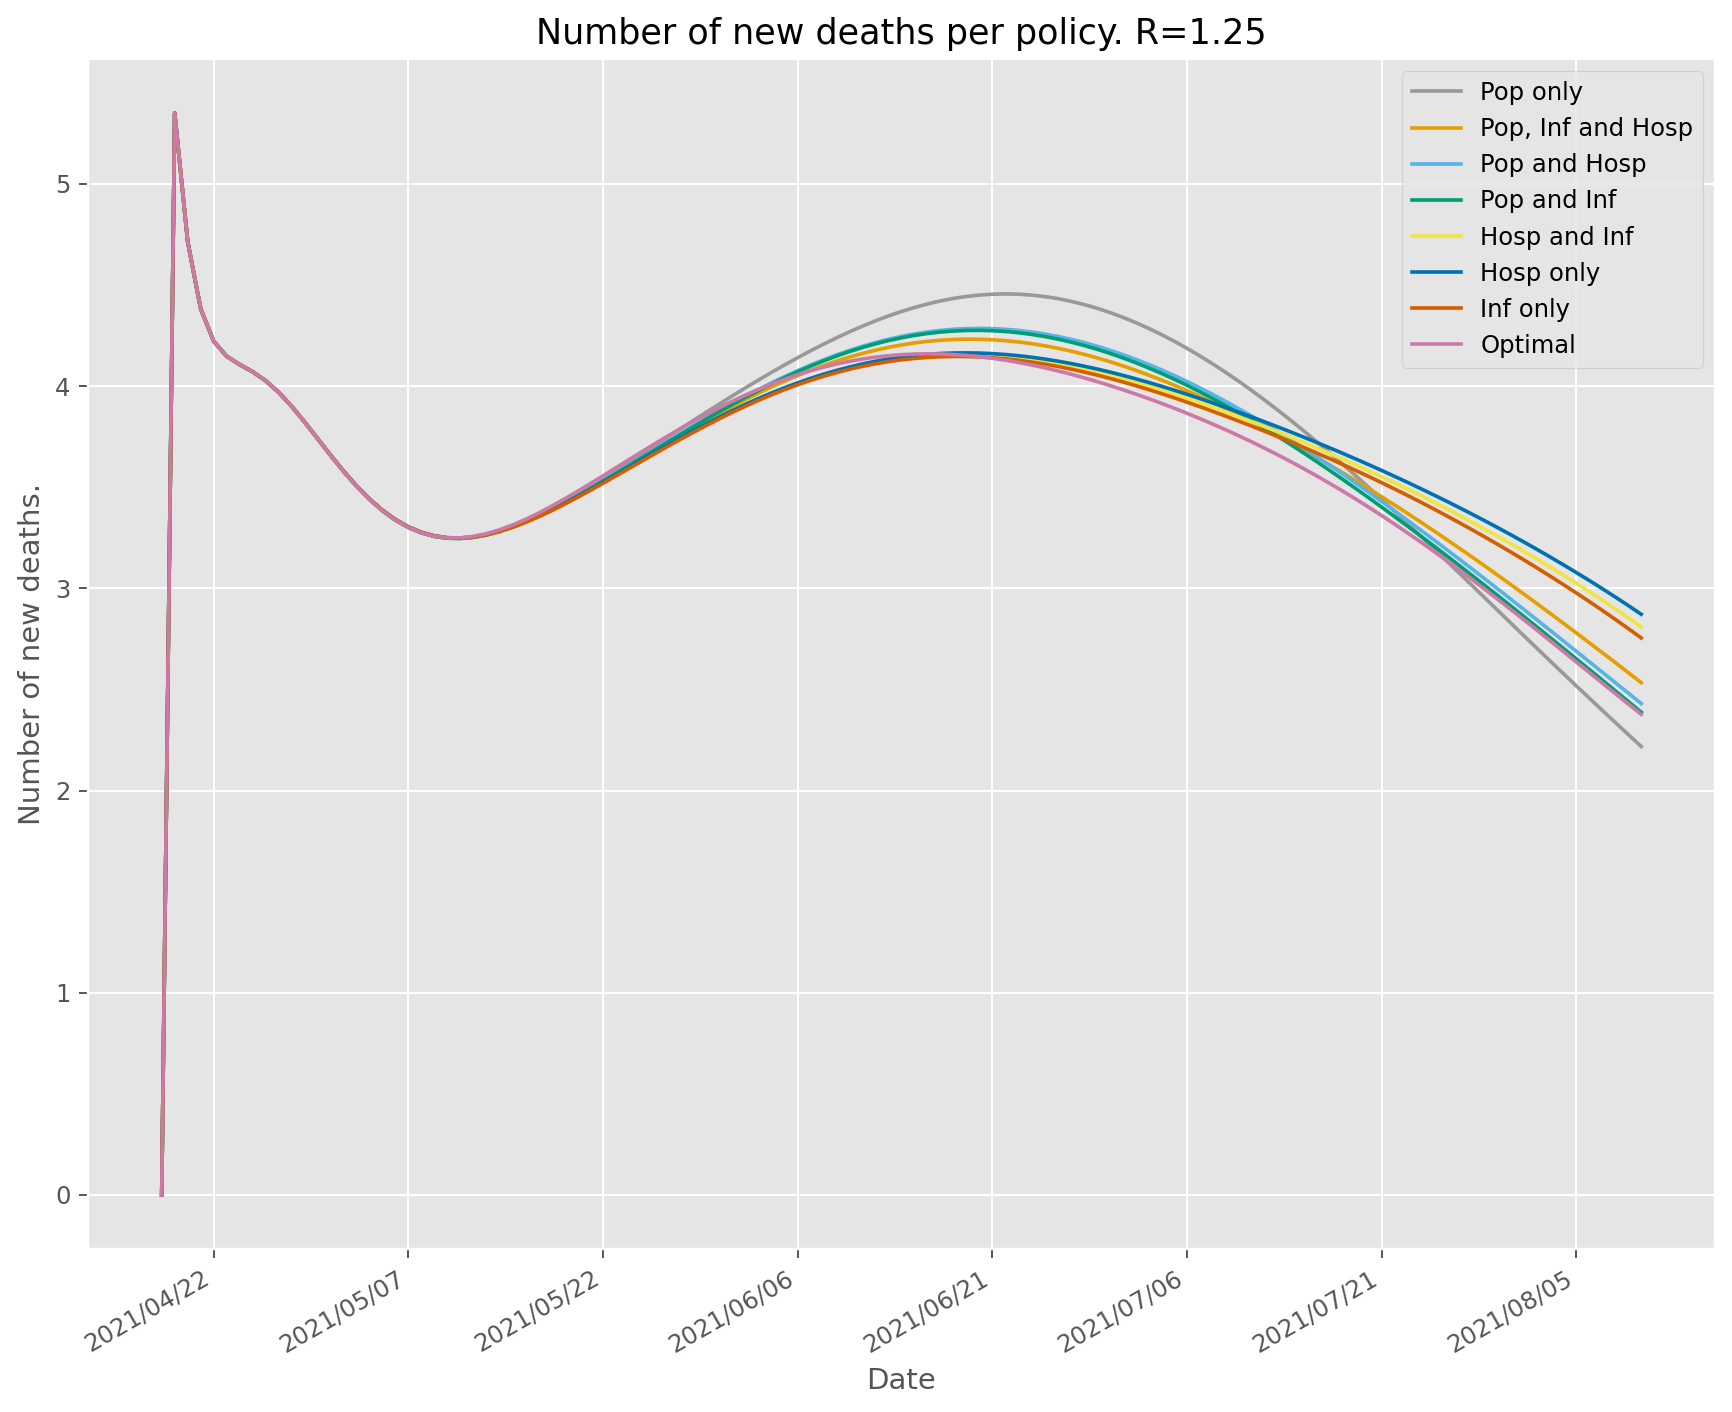

In [7]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[2], metric='new deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Optimal: 1521.7738678041983
Pop only: 1560.5449649228267
Pop and Inf: 1574.1264588956328
Pop and Hosp: 1582.6951826227166
Pop, Inf and Hosp: 1593.74373320641
Inf only: 1621.241844929375
Hosp and Inf: 1629.8959480287112
Hosp only: 1639.4547370962111


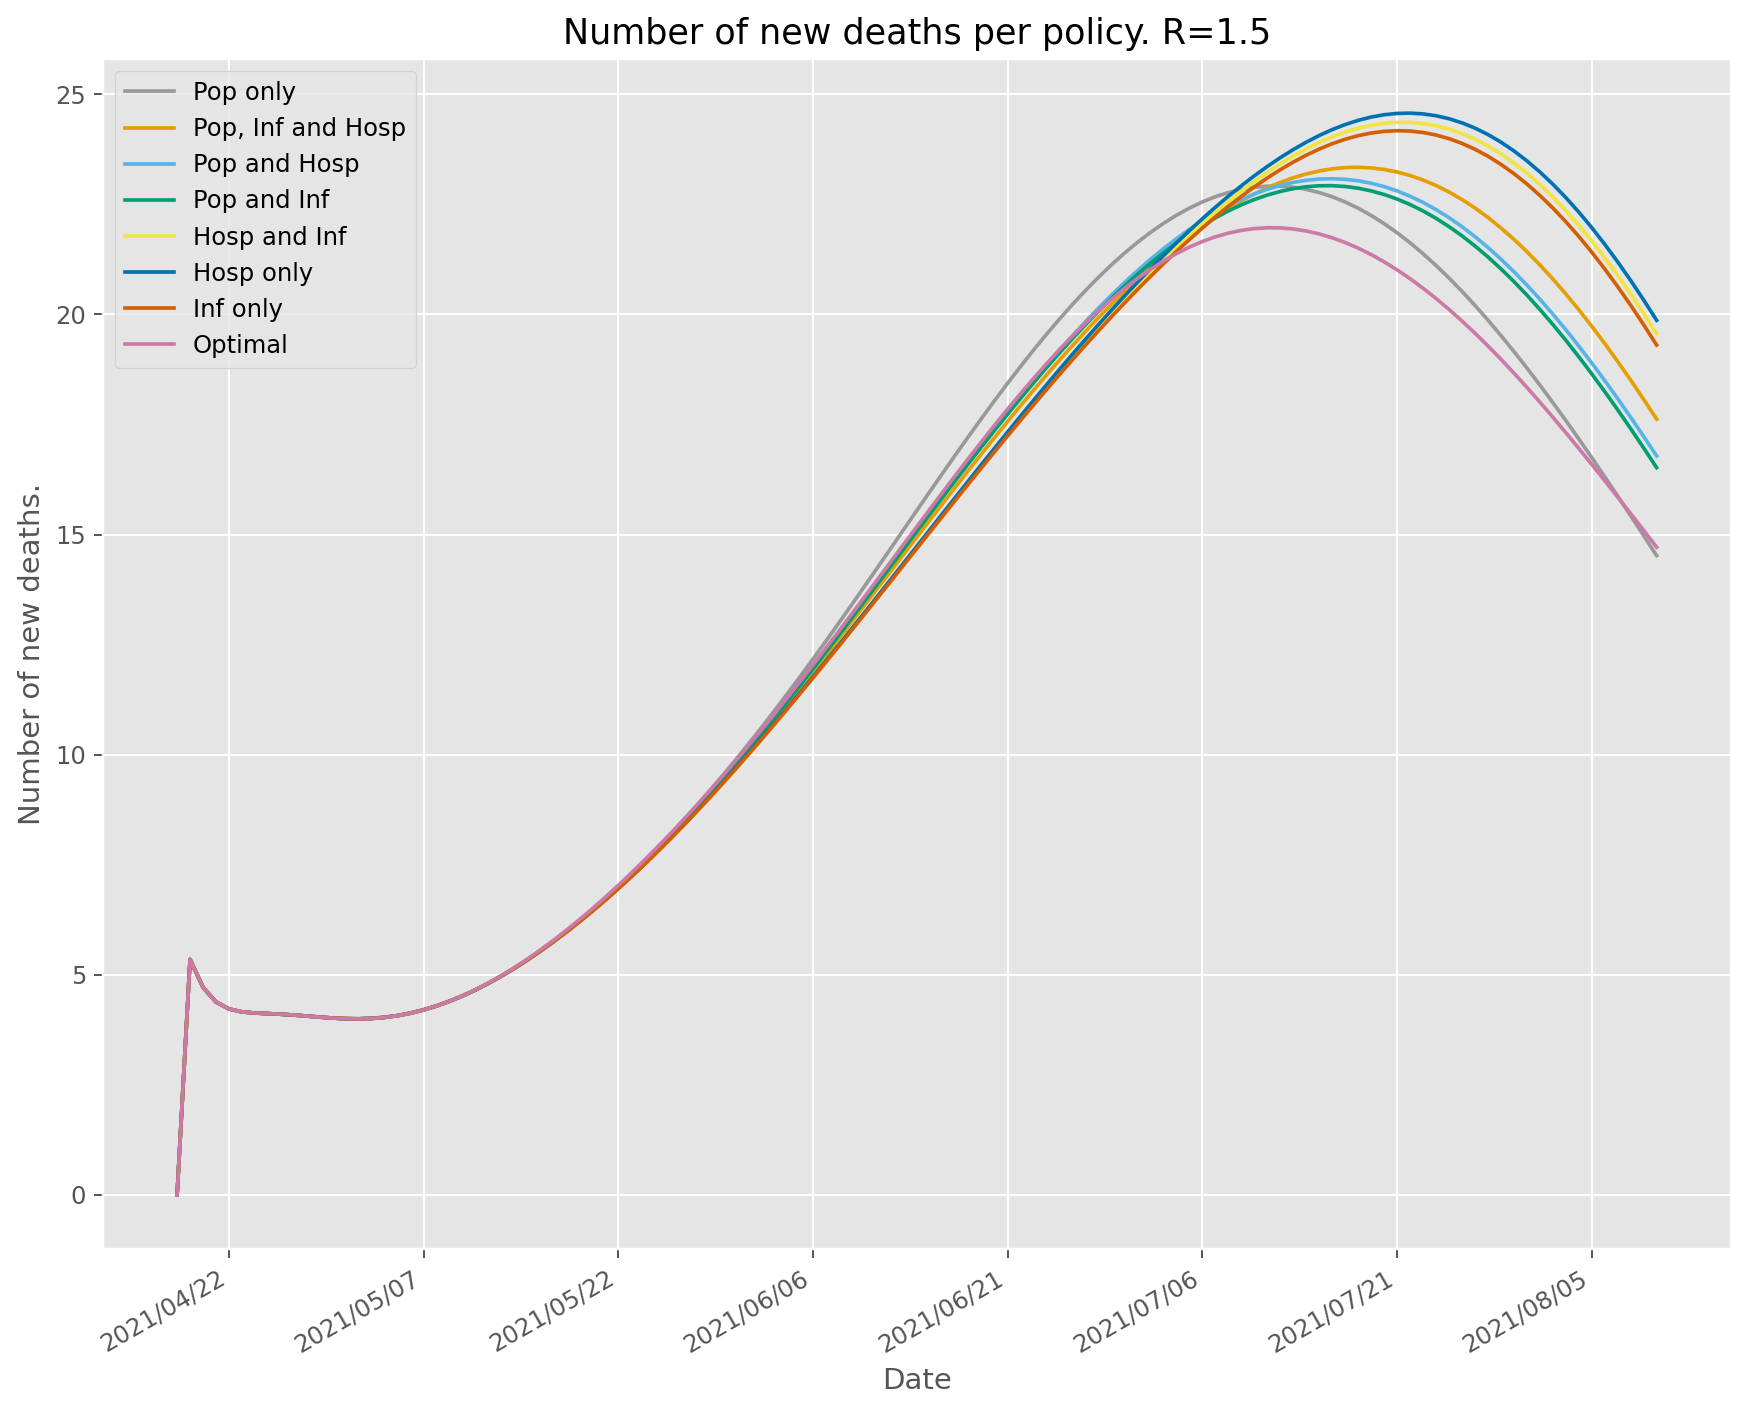

In [8]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='new deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 7300.561400749399
Pop and Inf: 7468.338732693266
Pop and Hosp: 7487.204411388015
Pop, Inf and Hosp: 7537.484650903706
Inf only: 7654.984305245279
Hosp and Inf: 7668.505031989294
Hosp only: 7683.529644886674


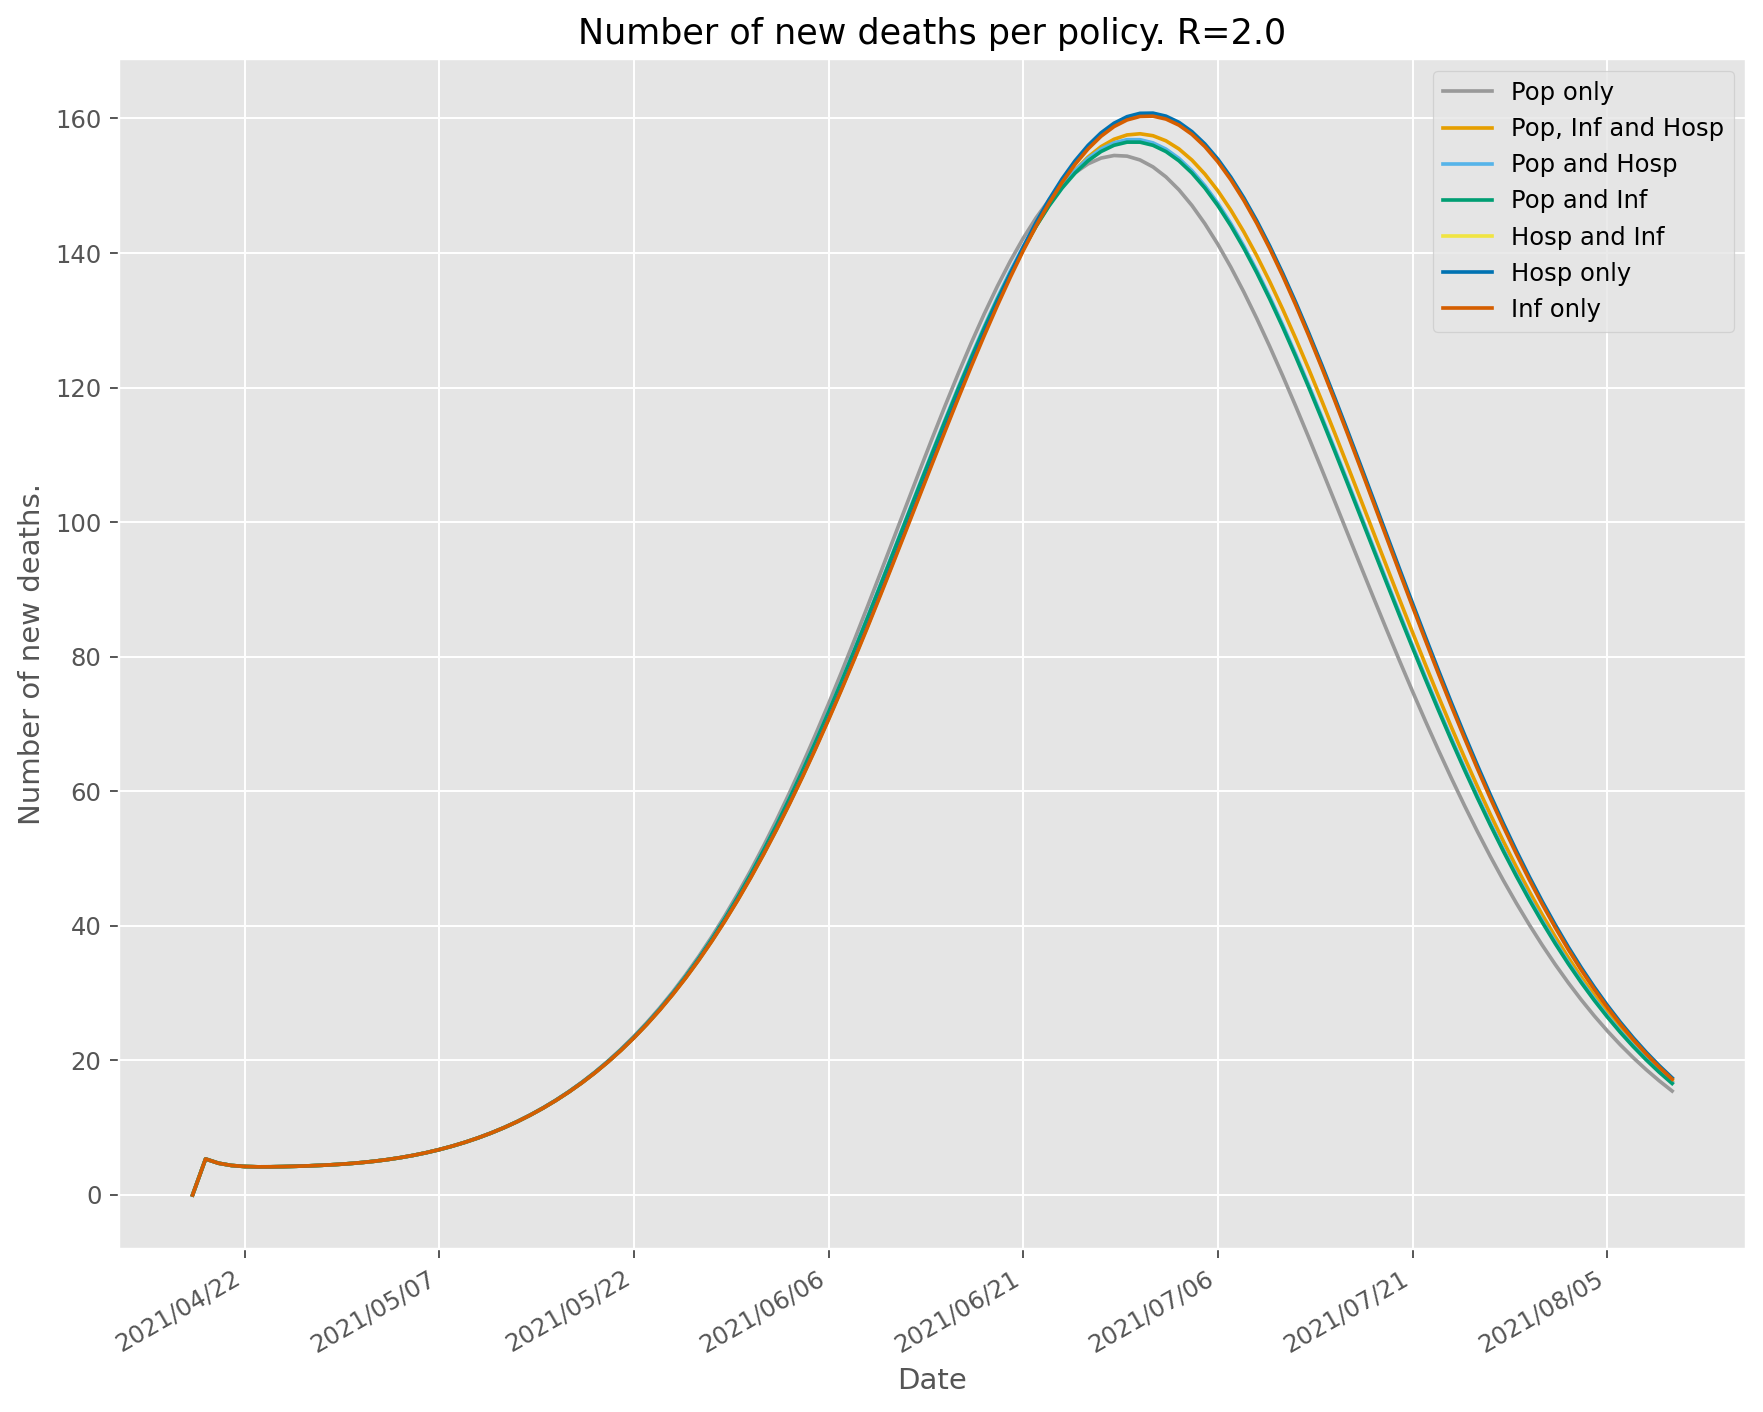

In [9]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[4], metric='new deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

# Hospitalizations

Inf only: 692.2784931147703
Hosp and Inf: 692.6978403084962
Hosp only: 693.1510220460887
Pop, Inf and Hosp: 695.6251196685157
Pop and Inf: 697.1821579001324
Pop and Hosp: 697.5454838245292
Optimal: 699.6915531858037
Pop only: 703.8447842177667


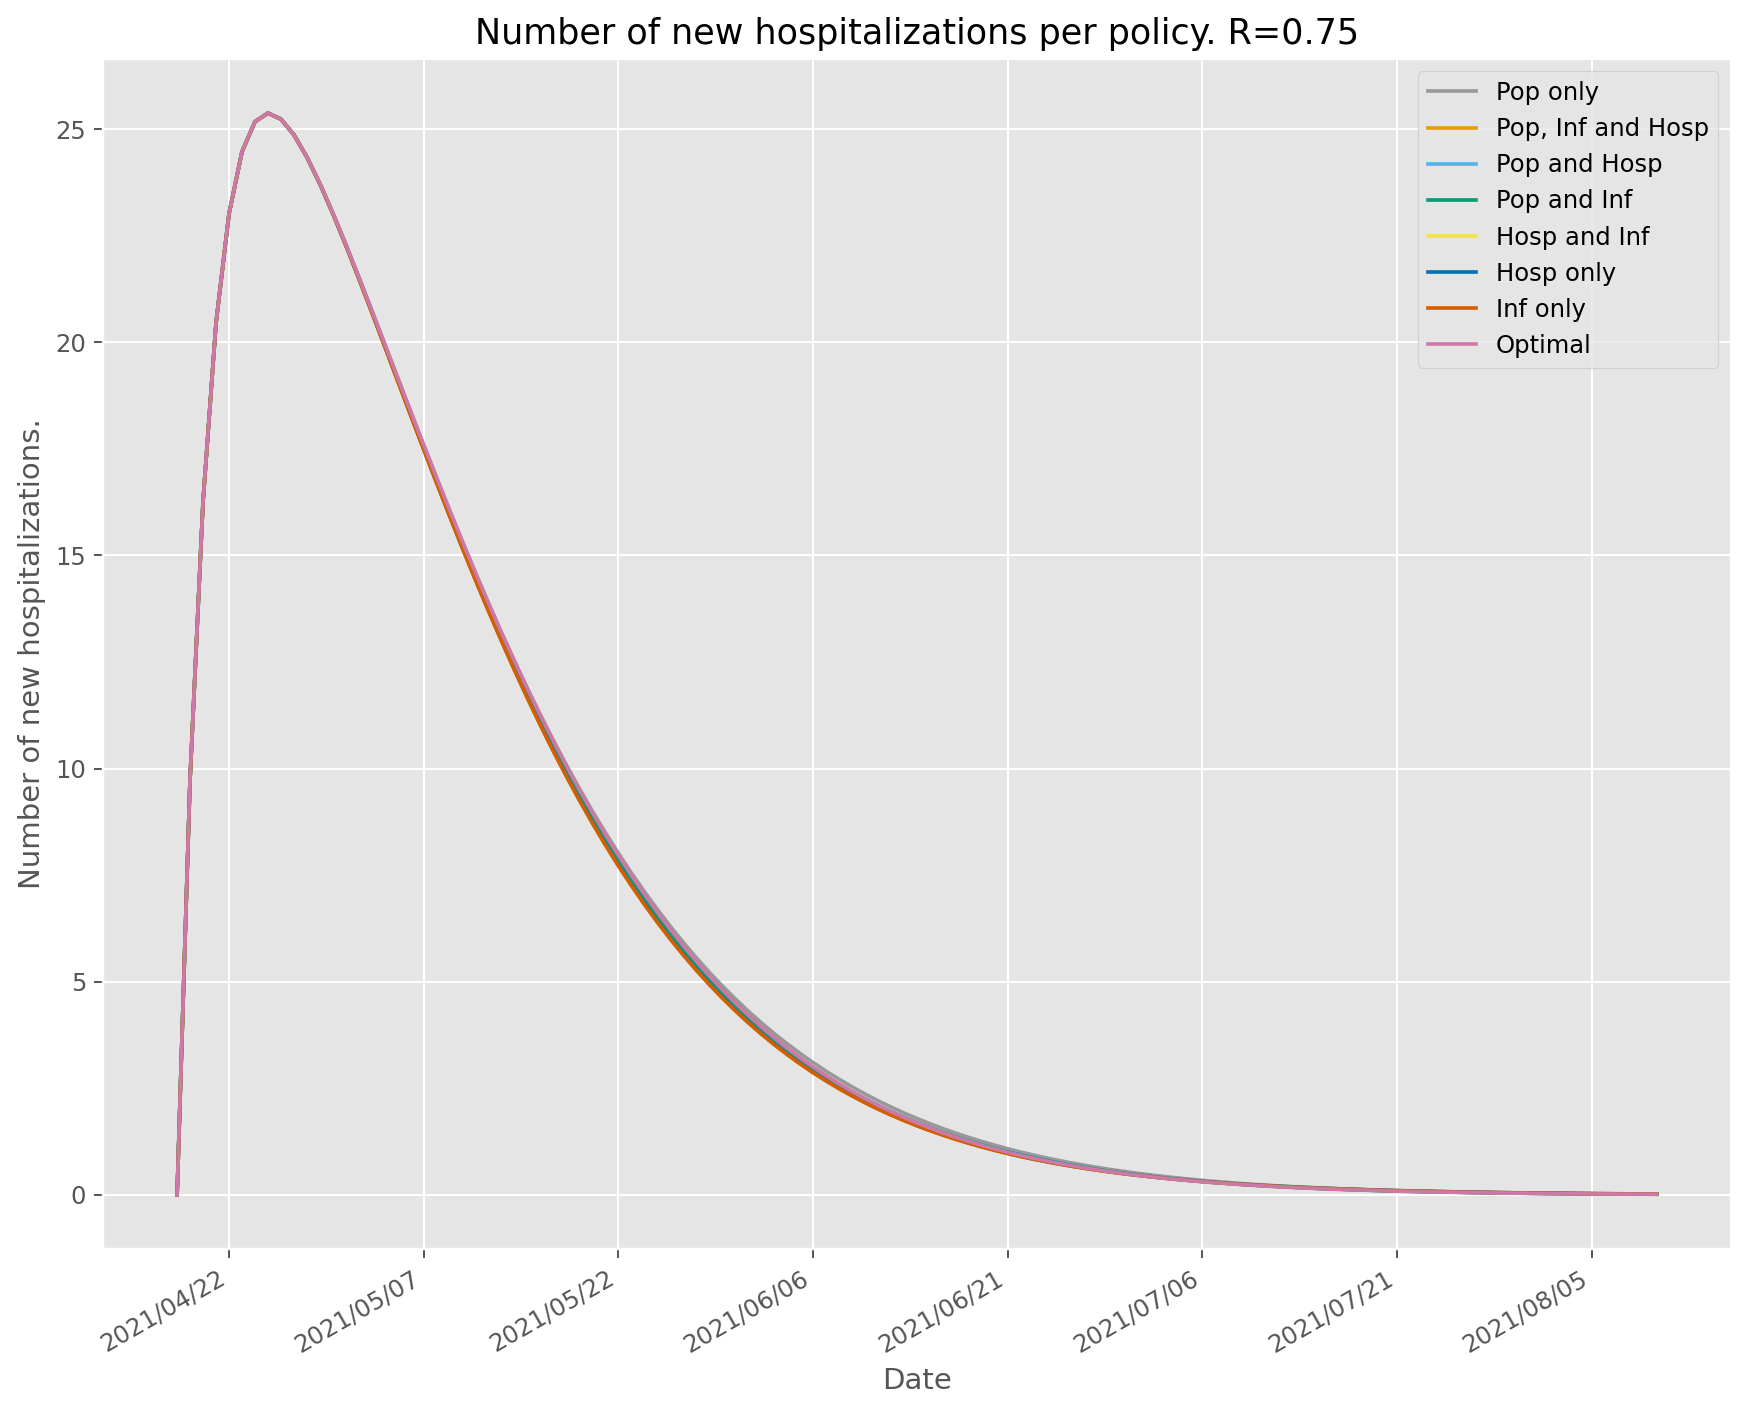

In [10]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='new hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Inf only: 1524.014361485645
Hosp and Inf: 1526.9054778995528
Hosp only: 1530.1763103457724
Pop, Inf and Hosp: 1532.7937146976383
Pop and Inf: 1537.4299167806532
Pop and Hosp: 1539.8233886406538
Optimal: 1560.86820060958
Pop only: 1571.5737455556905


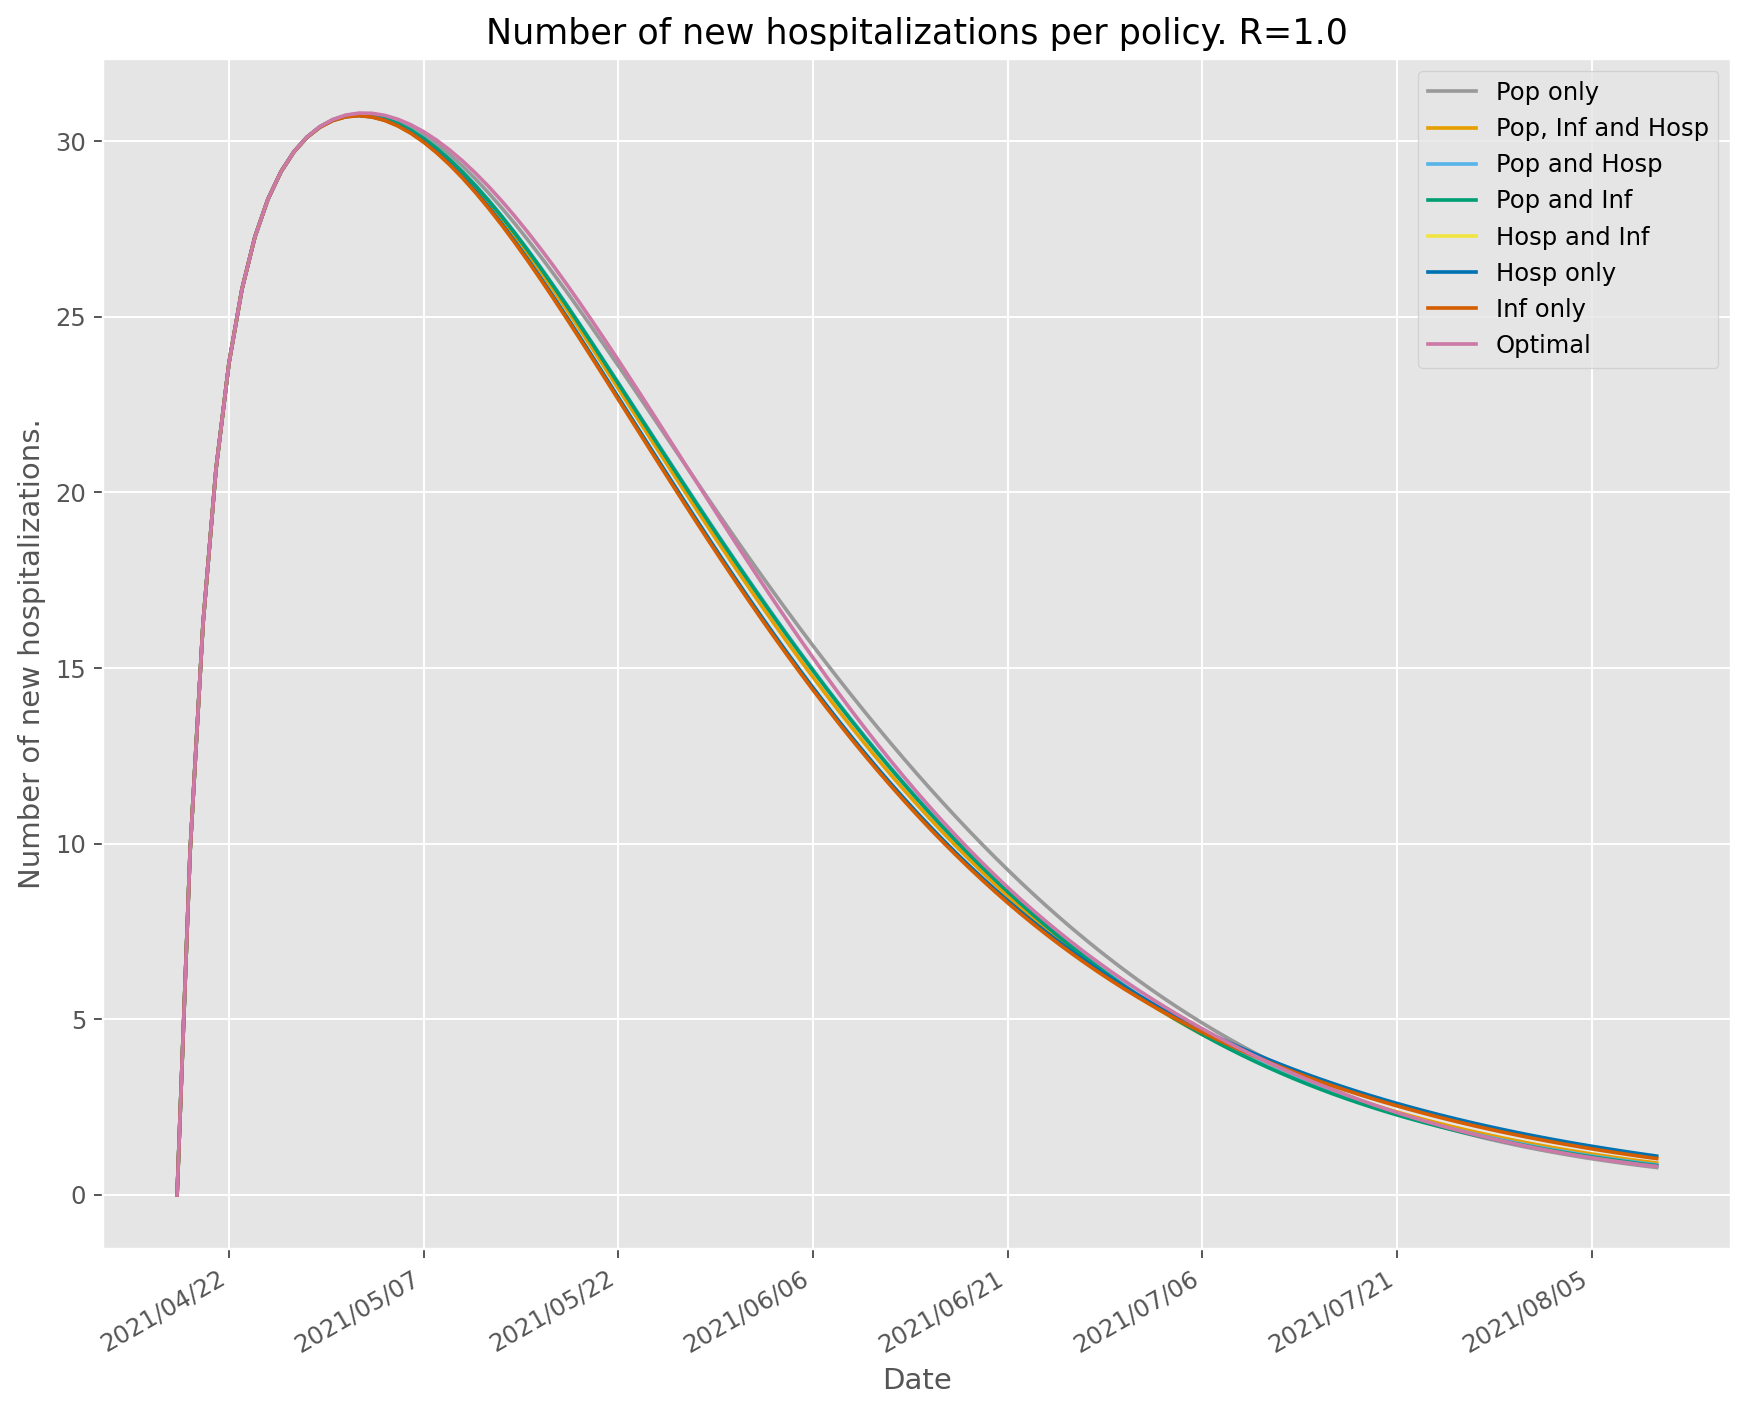

In [11]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='new hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop and Inf: 4950.08846651216
Pop and Hosp: 4974.315713712694
Pop, Inf and Hosp: 4980.416524550875
Inf only: 5038.50981441469
Pop only: 5058.504065831737
Hosp and Inf: 5066.039156544006
Optimal: 5067.949616555569
Hosp only: 5099.168094870661


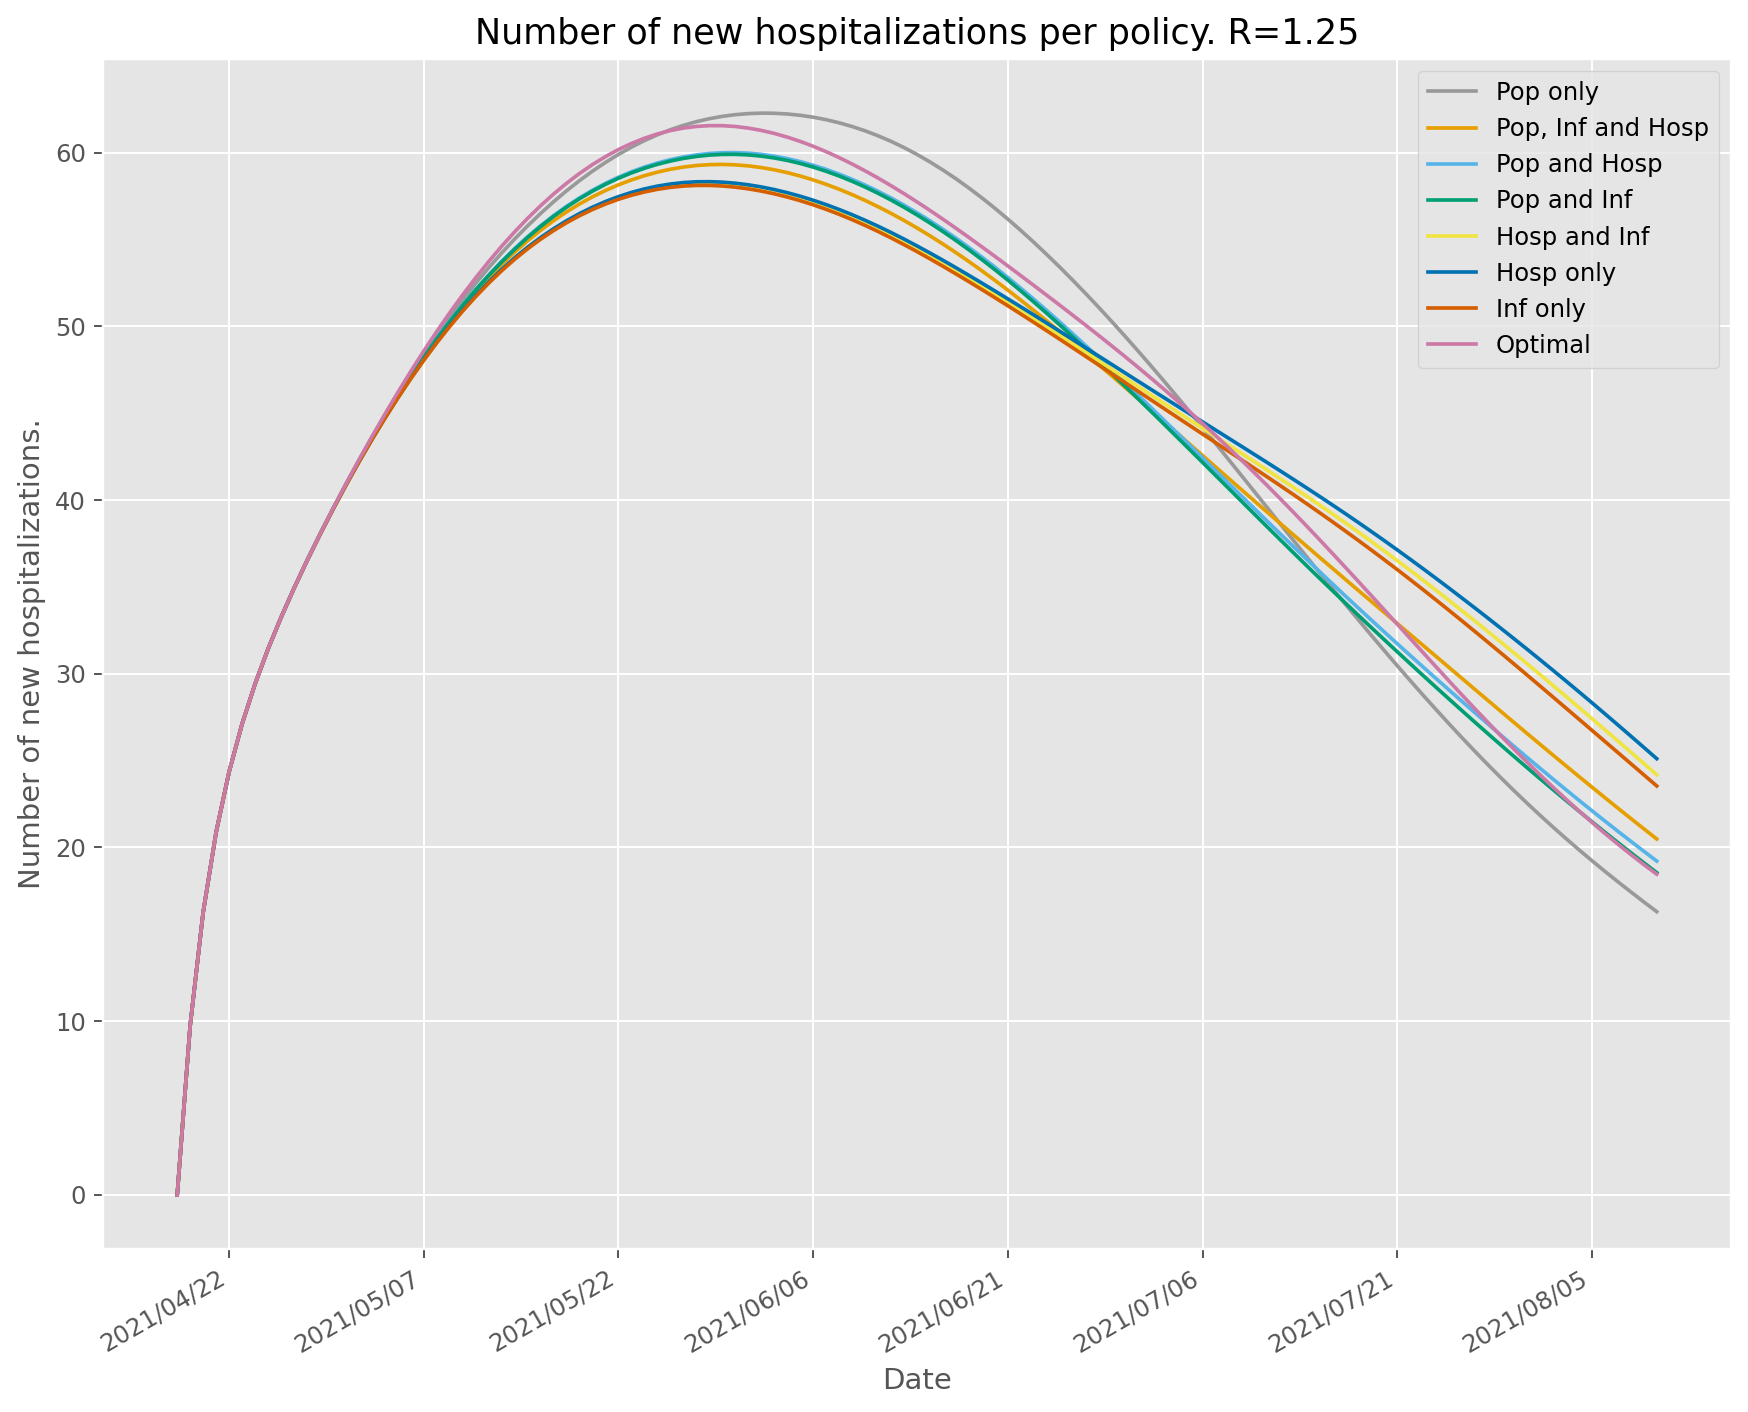

In [12]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[2], metric='new hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Optimal: 18168.000260823723
Pop only: 18179.873325062665
Pop and Inf: 18360.496304532197
Pop and Hosp: 18492.859039653984
Pop, Inf and Hosp: 18733.718082891435
Inf only: 19435.5350713767
Hosp and Inf: 19557.081294321848
Hosp only: 19713.48383729894


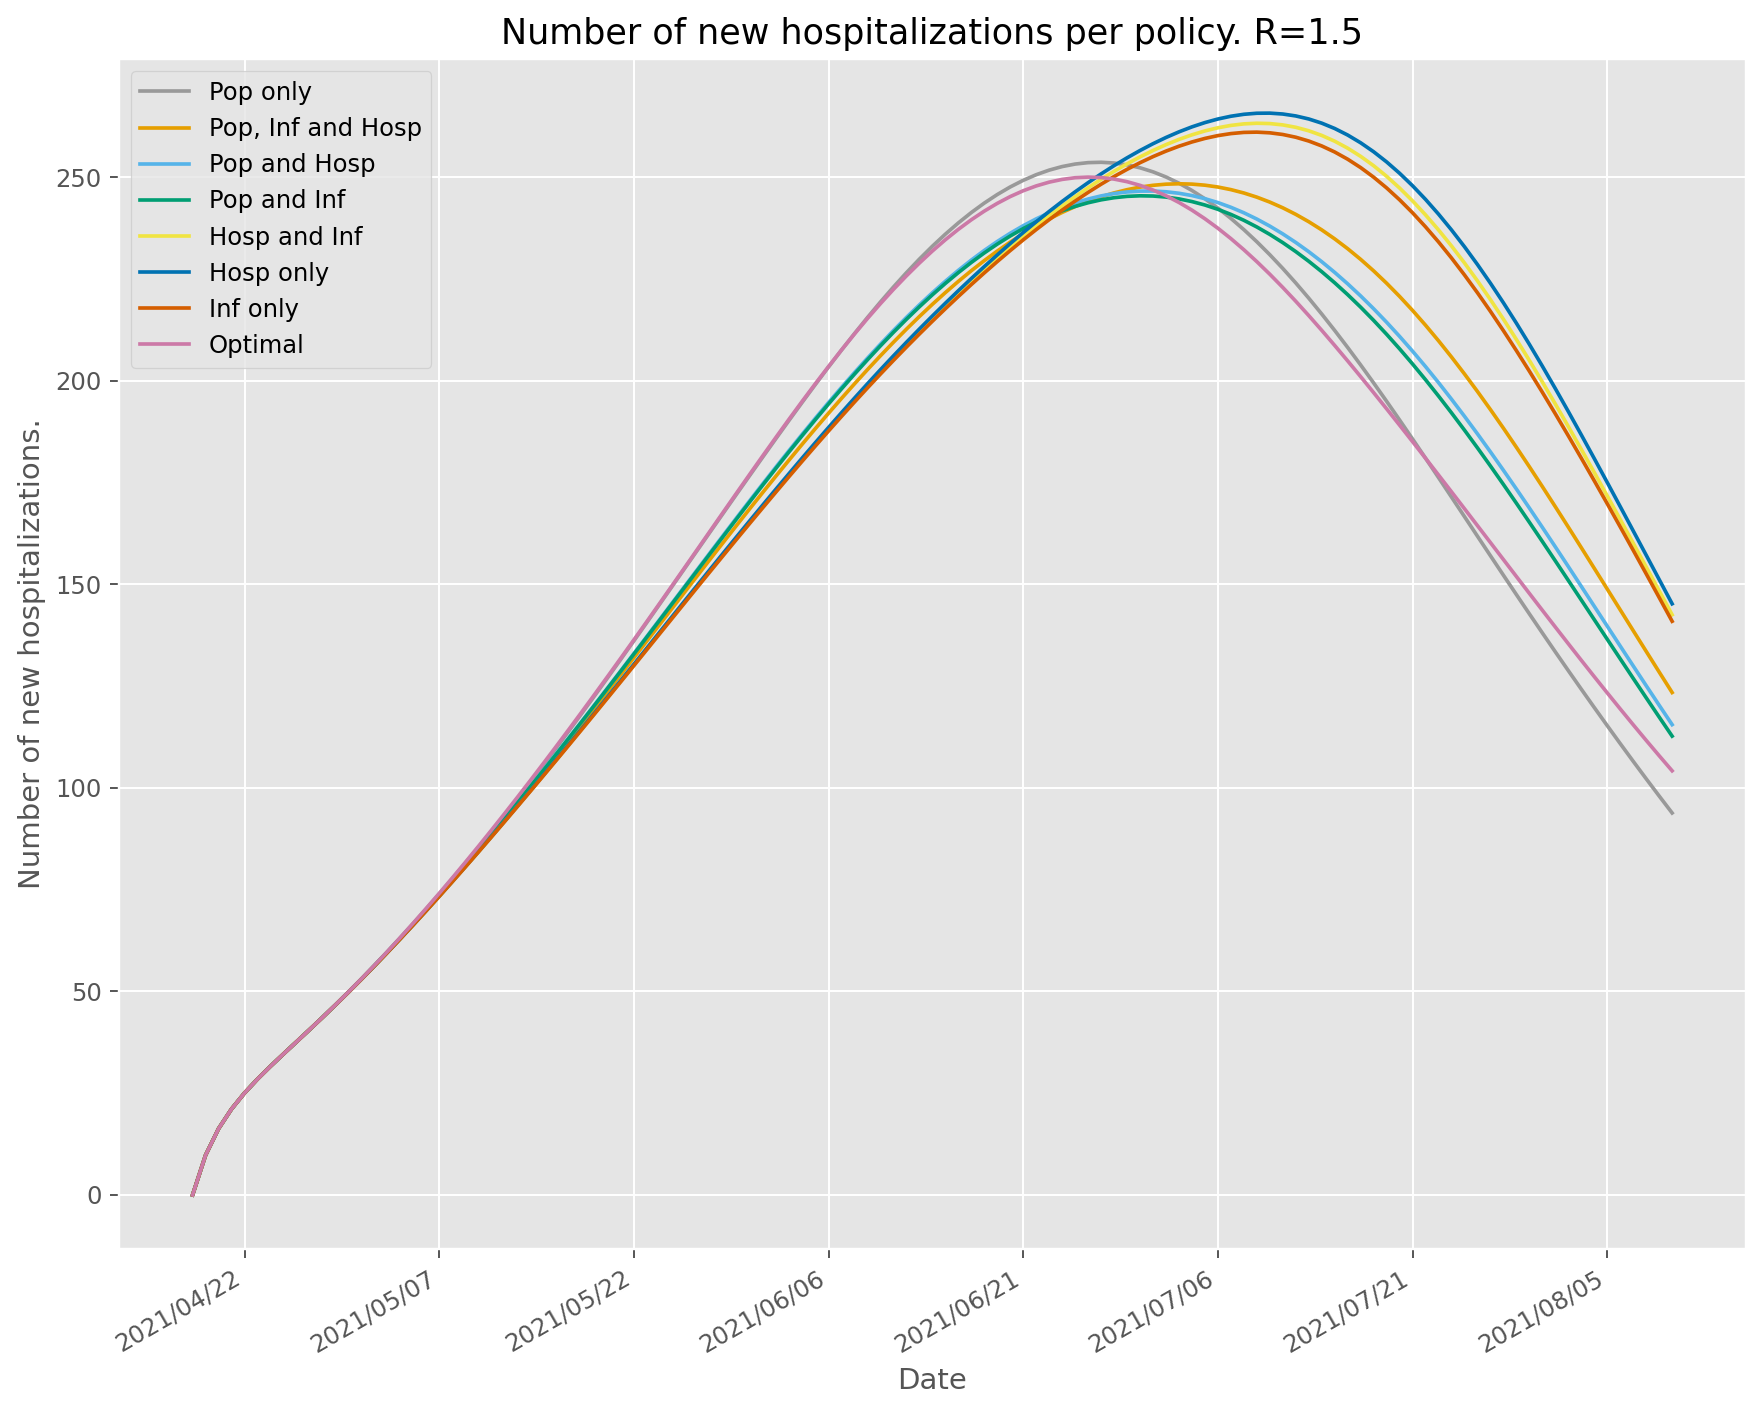

In [14]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='new hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 71797.42599469224
Pop and Inf: 73516.33626421387
Pop and Hosp: 73722.07803746629
Pop, Inf and Hosp: 74503.15006586313
Inf only: 76513.86608040135
Hosp and Inf: 76694.49104021821
Hosp only: 76917.93709826011


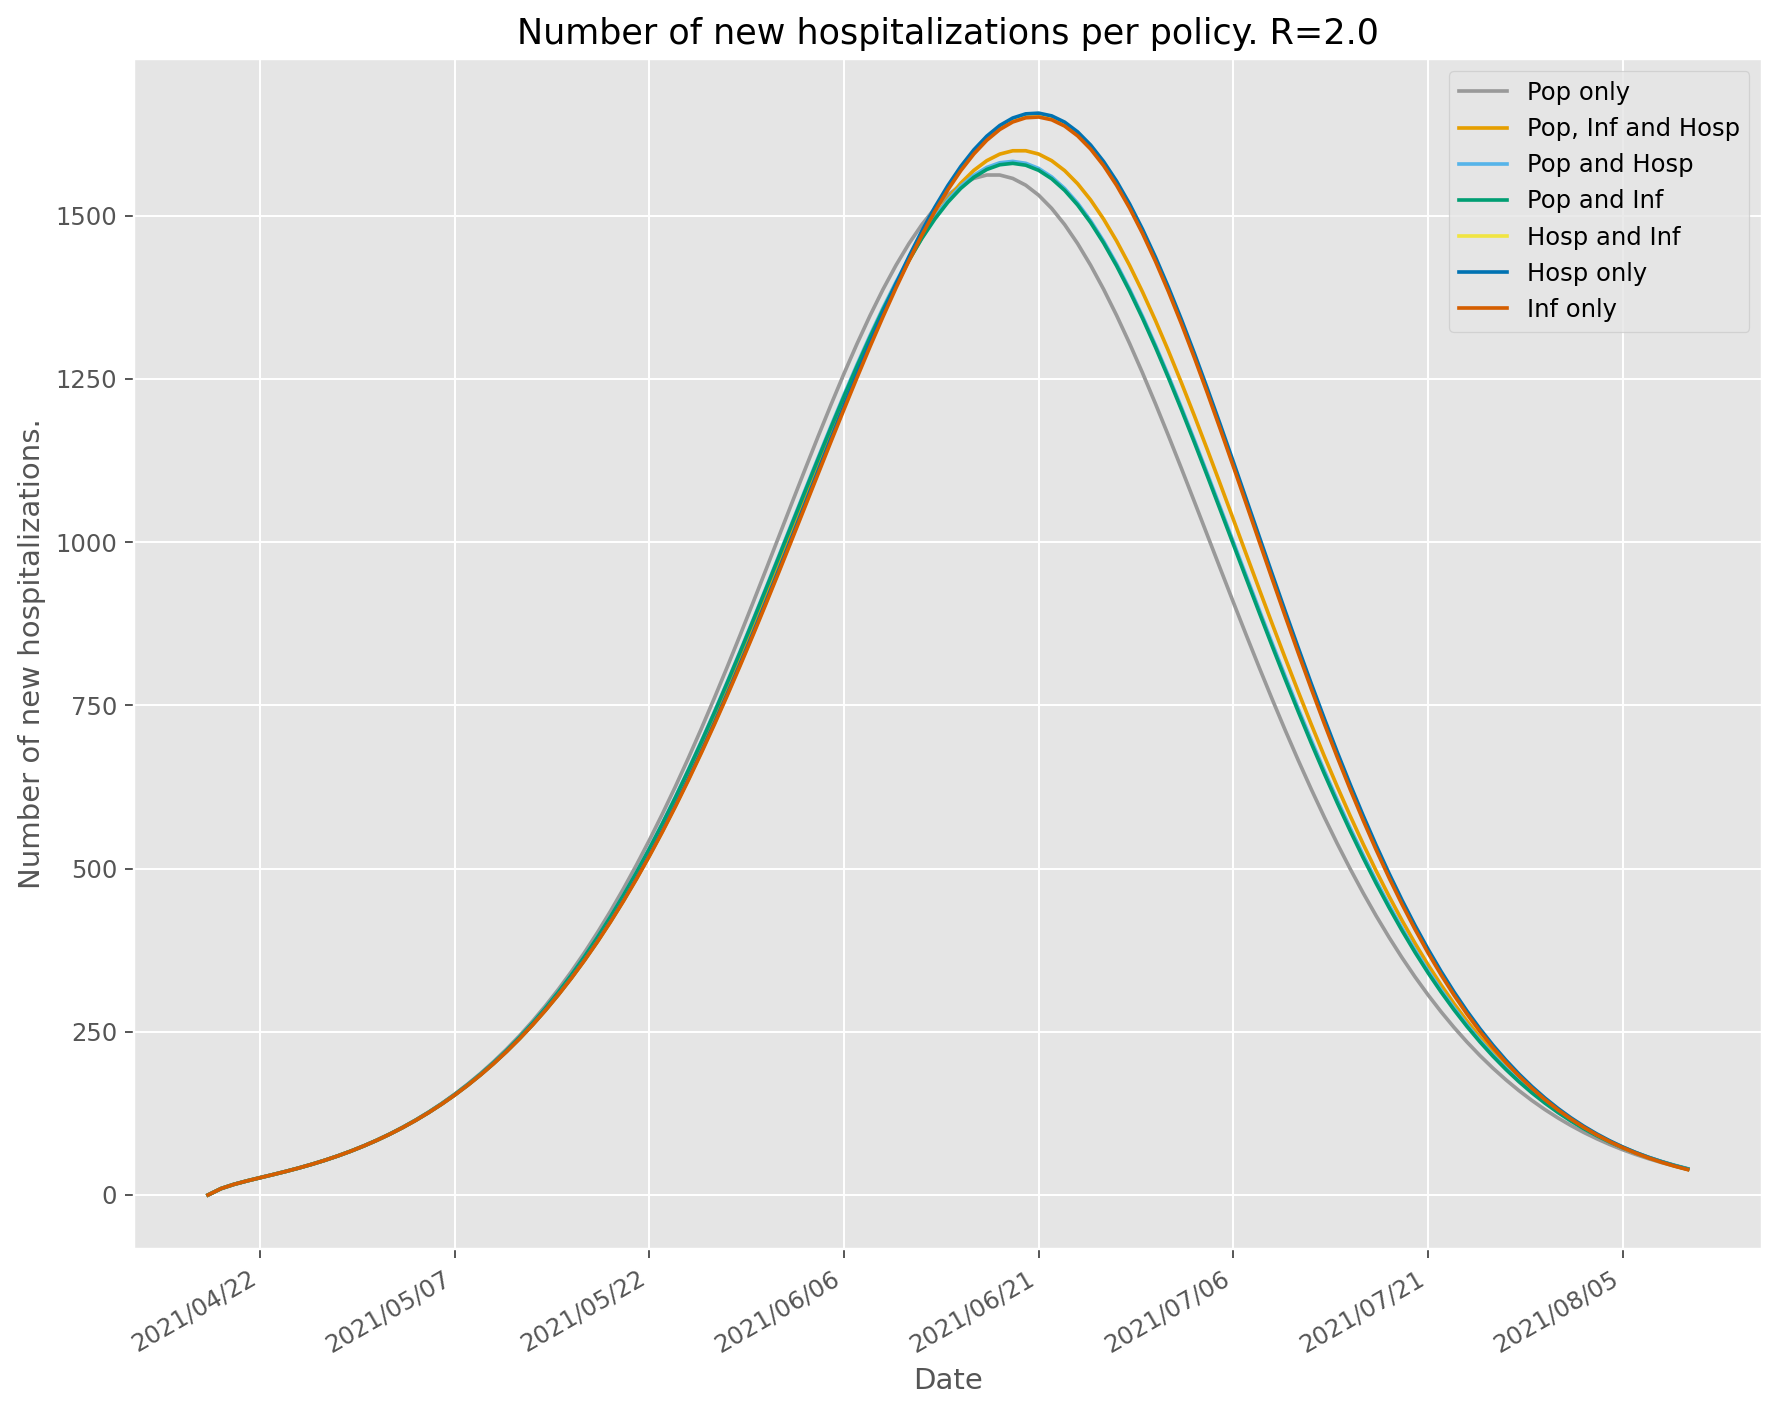

In [15]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[4], metric='new hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

# Infections

Optimal: 16455.132624681453
Inf only: 16528.07317747872
Hosp and Inf: 16532.25415411005
Hosp only: 16535.673070065728
Pop, Inf and Hosp: 16620.907012708834
Pop and Inf: 16664.45194564899
Pop and Hosp: 16667.54136483138
Pop only: 16808.800800231267


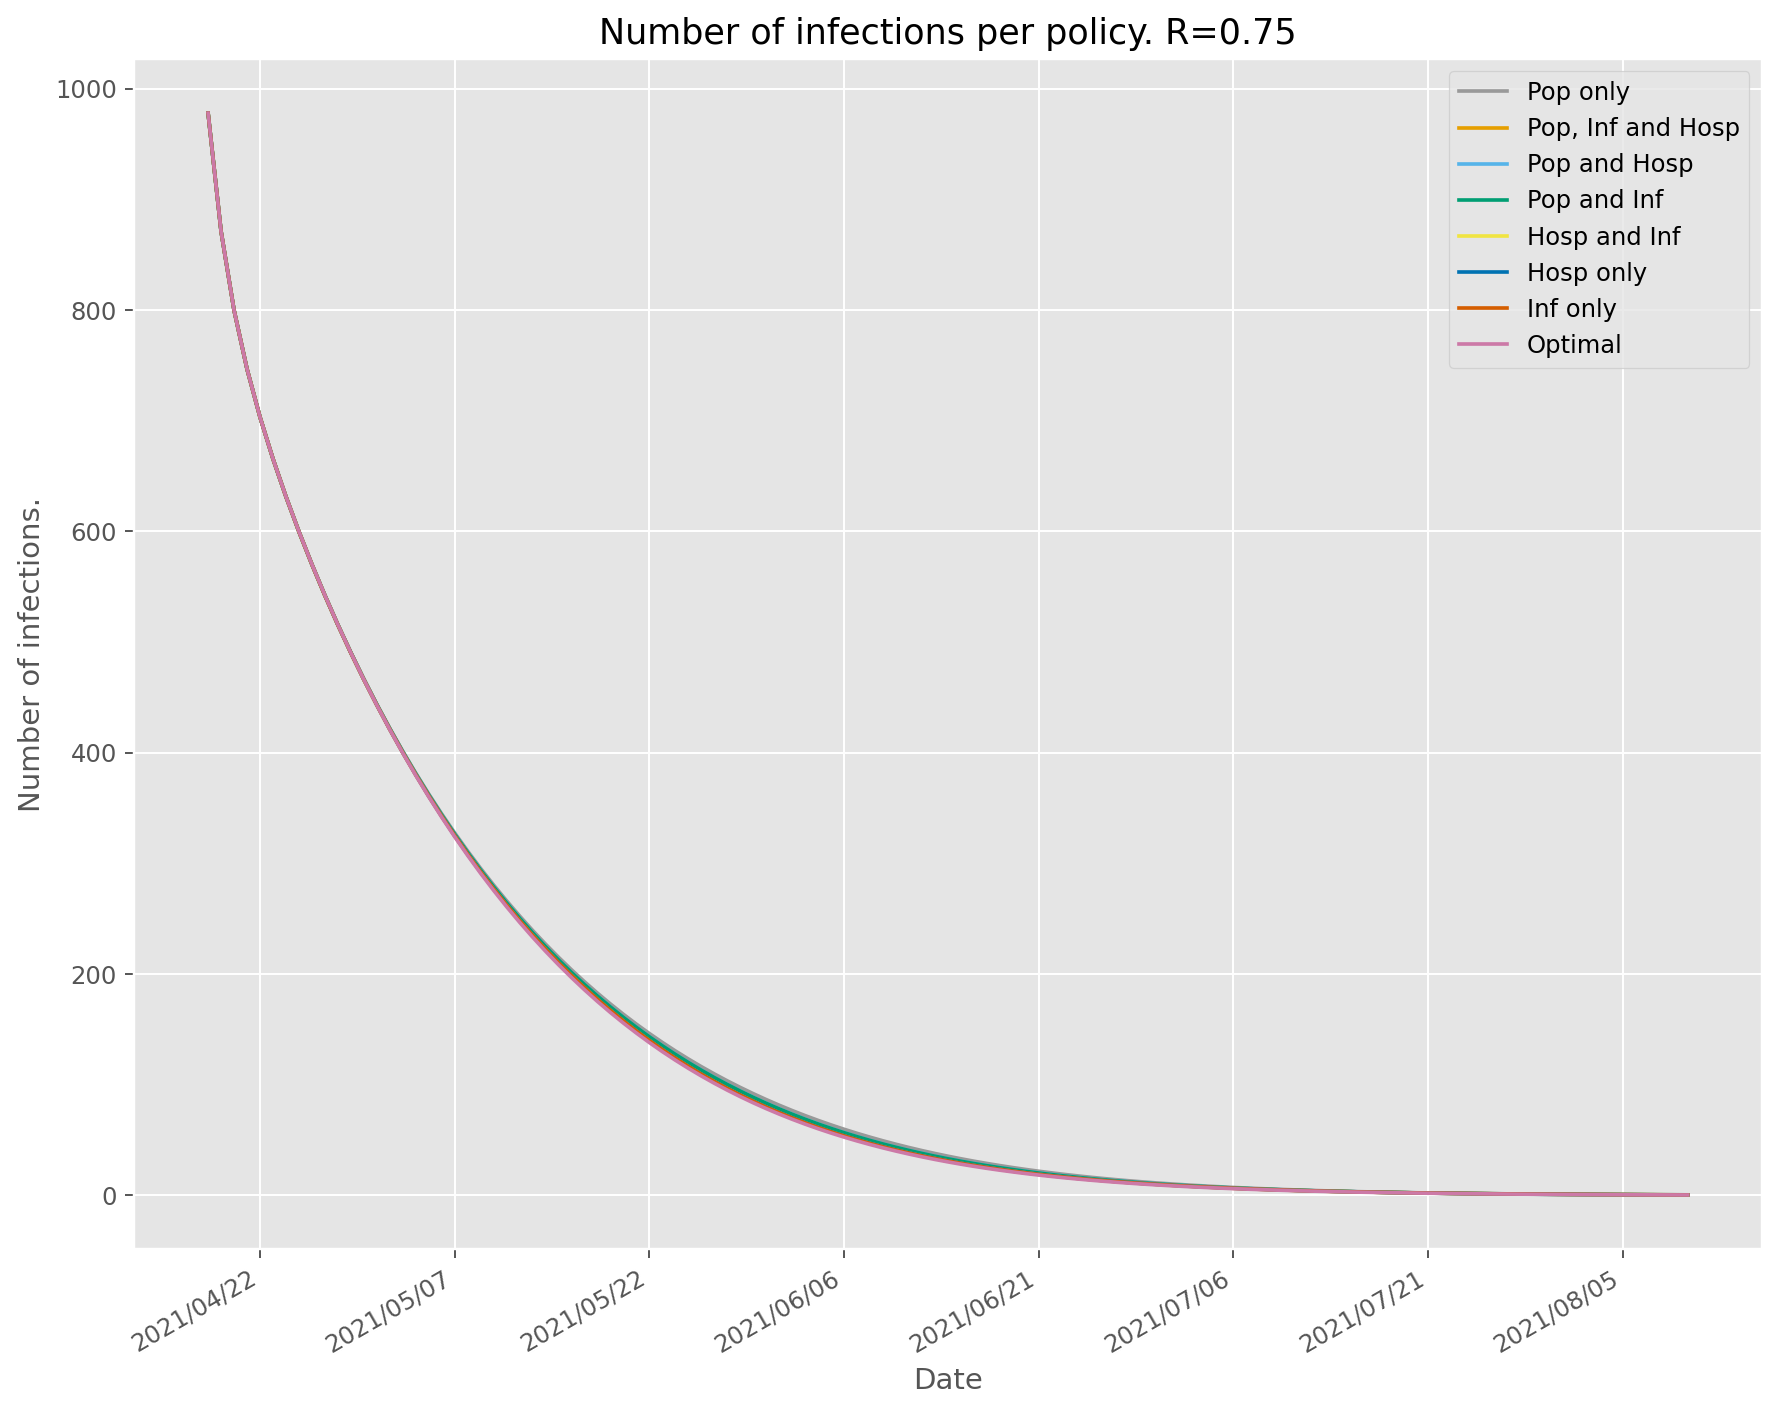

In [16]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='infections', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Optimal: 40613.0129032541
Inf only: 41907.63148057035
Hosp and Inf: 41982.967539511184
Hosp only: 42056.67194848174
Pop, Inf and Hosp: 42375.06145174022
Pop and Inf: 42572.880932714215
Pop and Hosp: 42622.644255776446
Pop only: 43526.190028709825


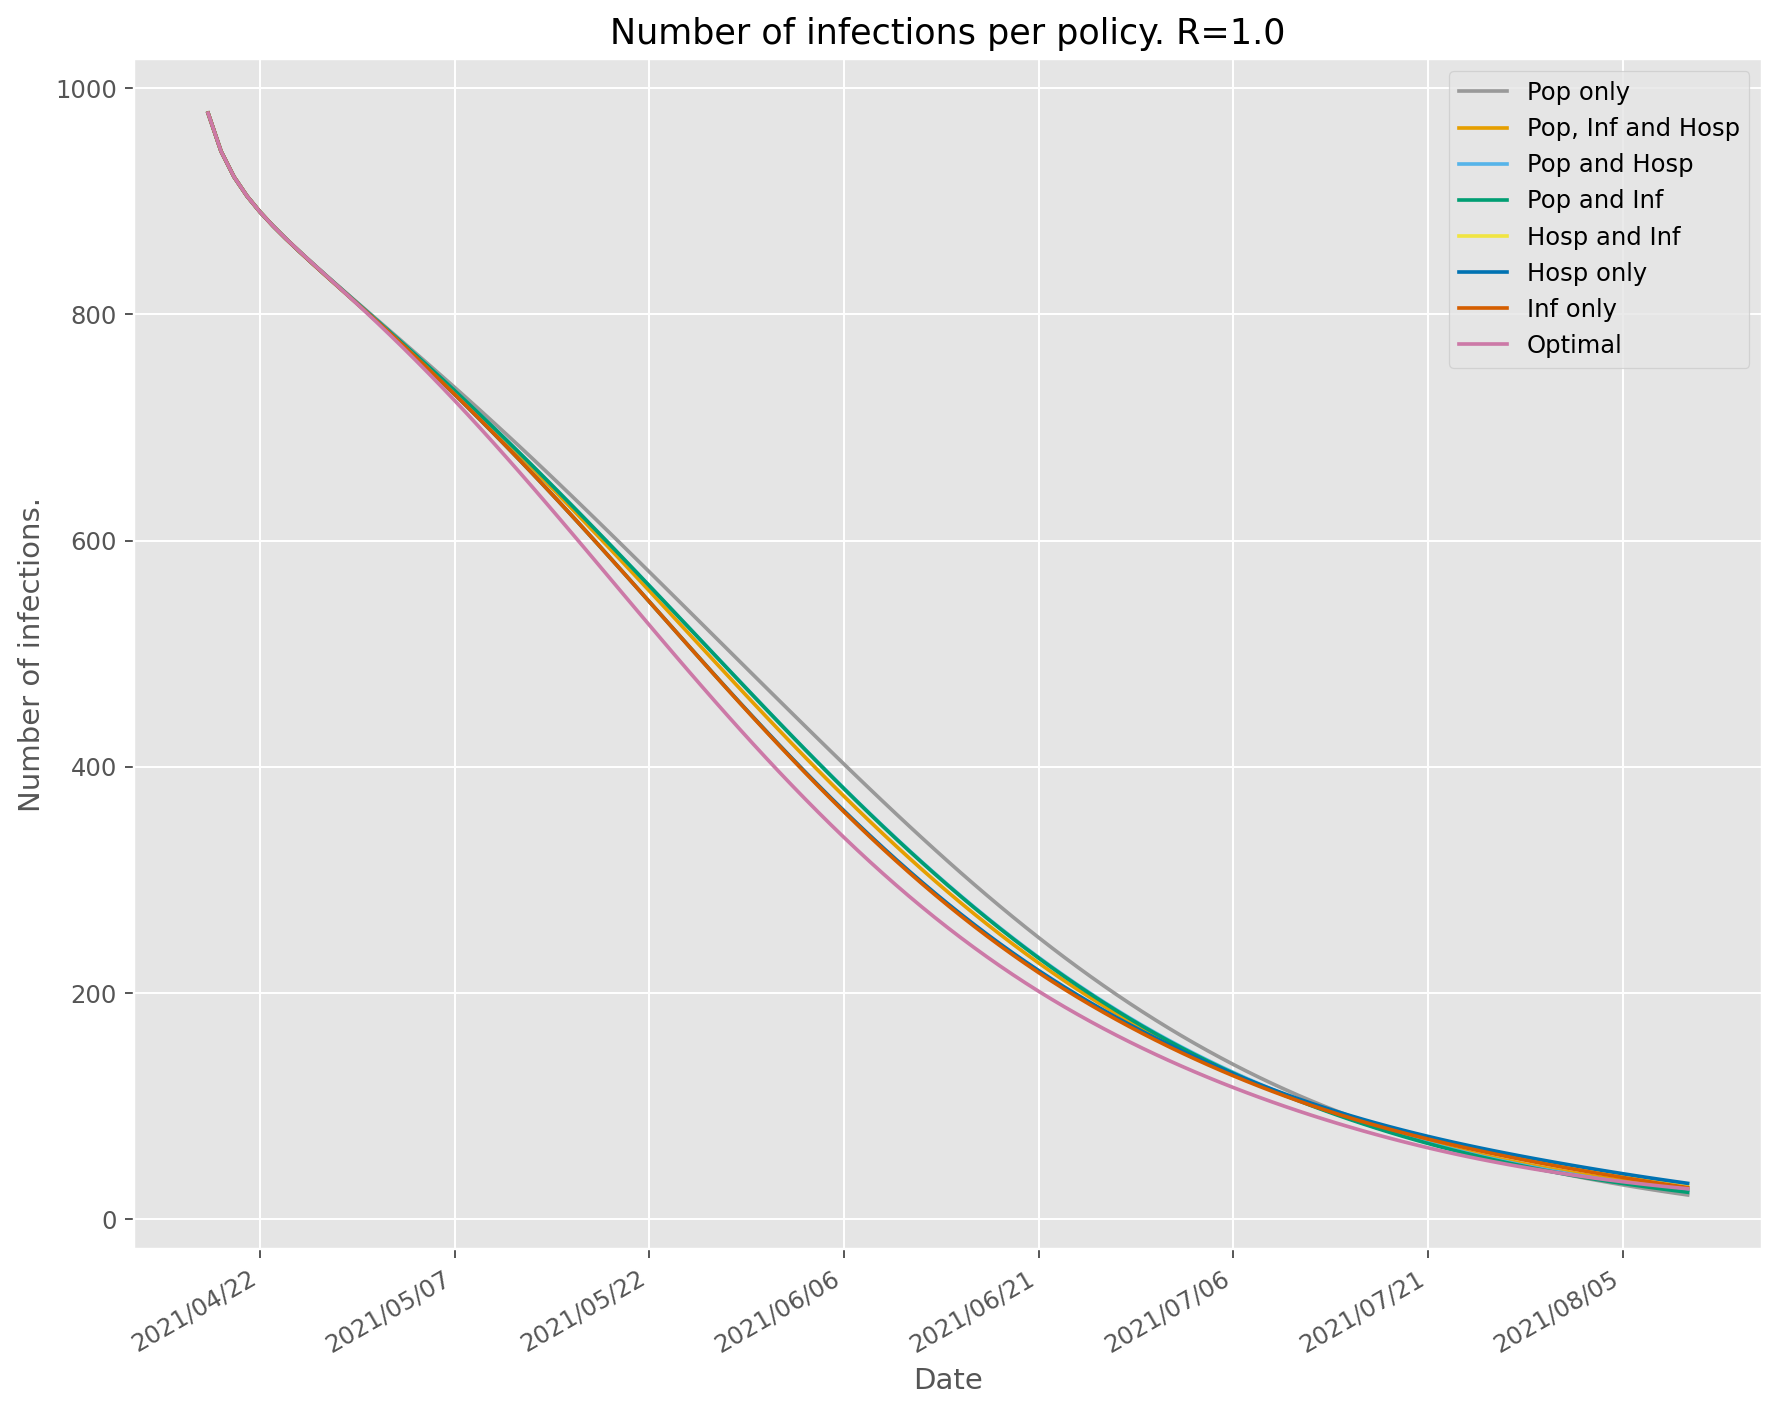

In [17]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='infections', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Optimal: 152519.2619424912
Inf only: 162772.8356531424
Pop and Inf: 162896.88539615466
Pop, Inf and Hosp: 163481.44998951015
Pop and Hosp: 163806.82199069753
Hosp and Inf: 164054.31507880133
Hosp only: 165374.81202648915
Pop only: 166184.22521938357


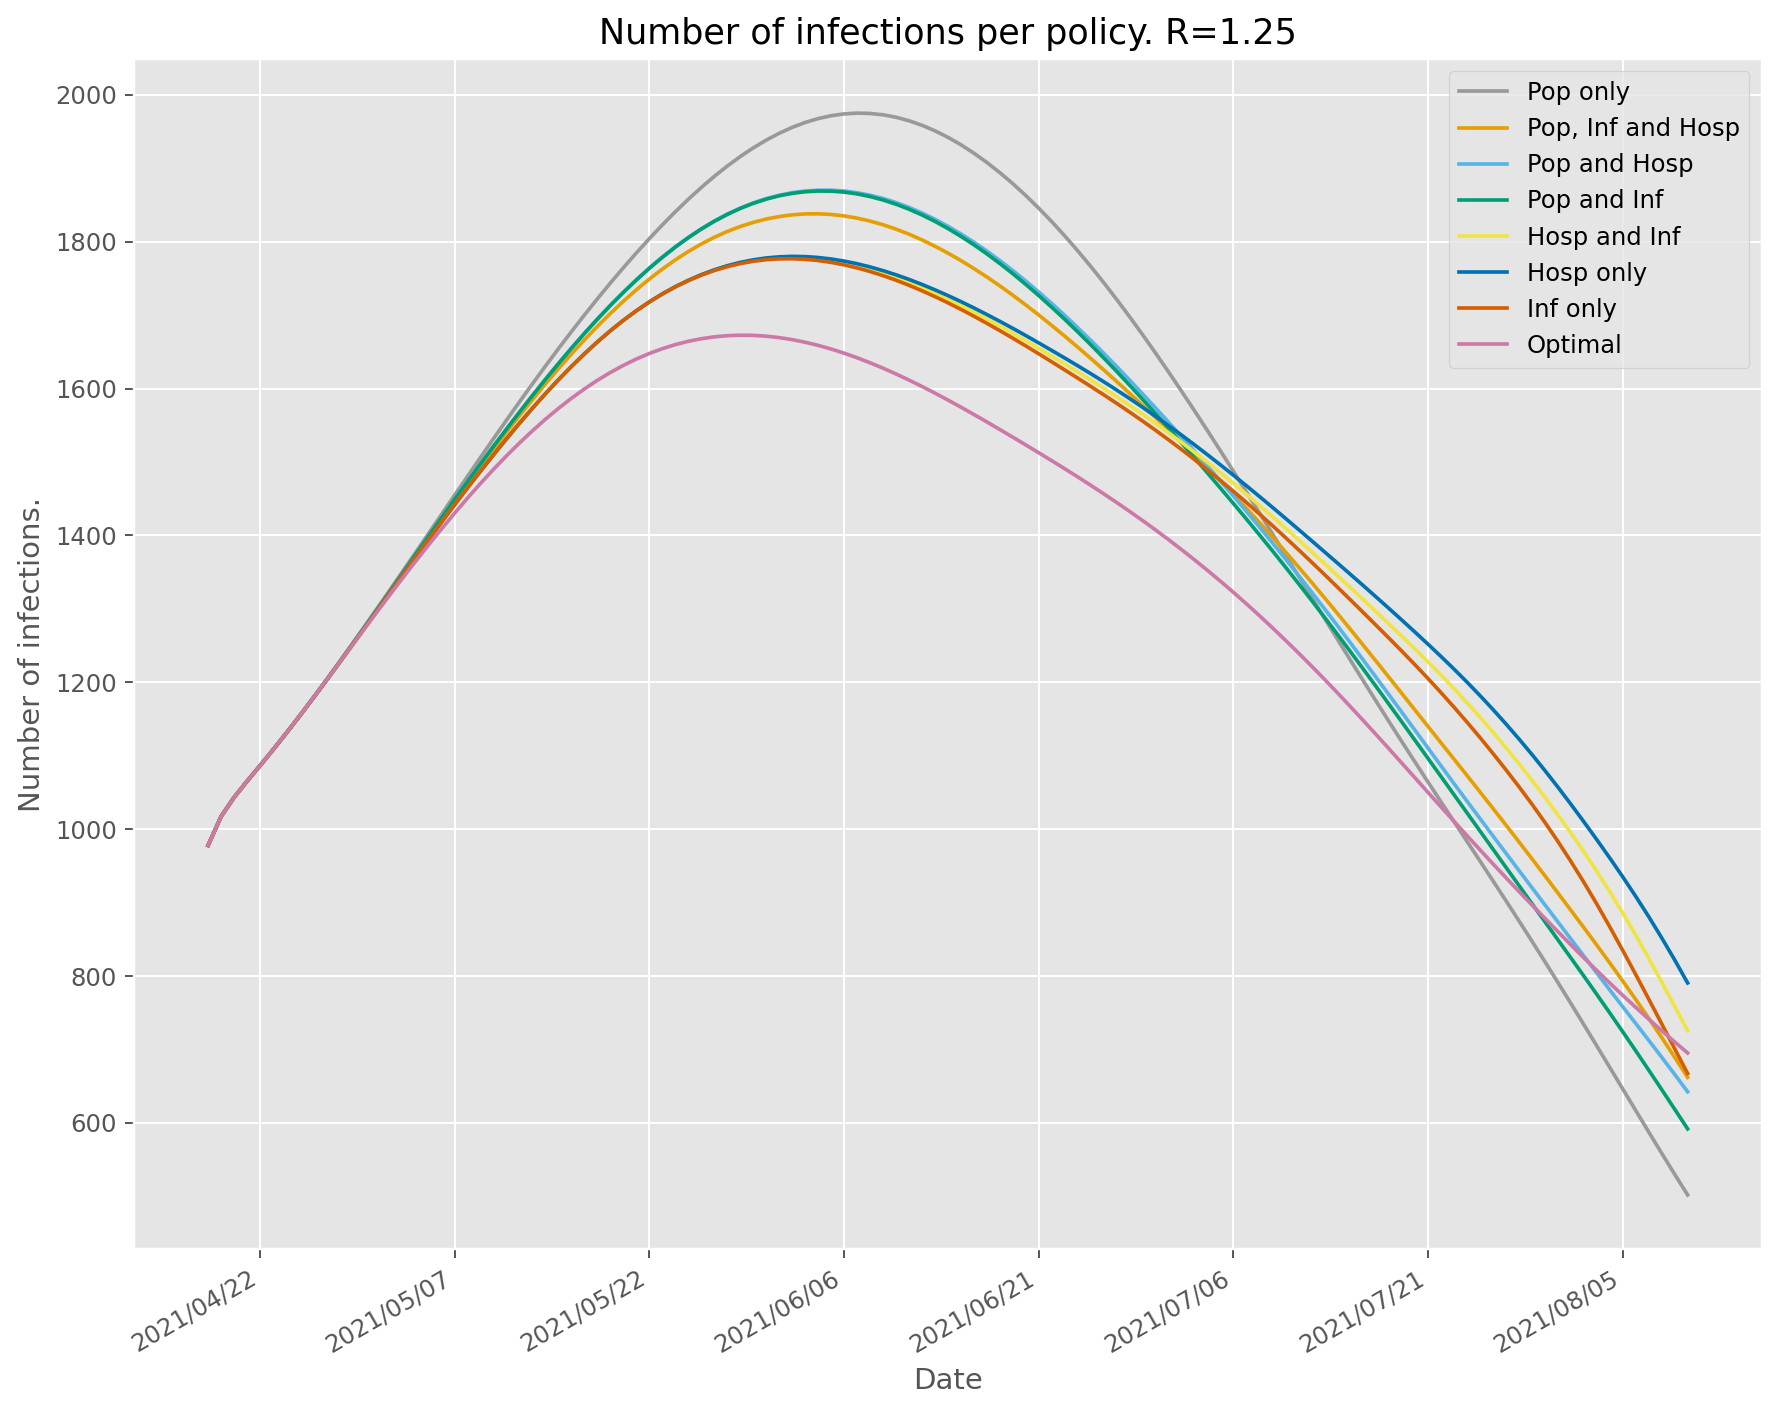

In [18]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[2], metric='infections', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Optimal: 603559.2931076584
Pop only: 617177.5936556655
Pop and Inf: 620375.720993539
Pop and Hosp: 624922.2044954083
Pop, Inf and Hosp: 627700.8322336673
Inf only: 632348.3322886573
Hosp and Inf: 637219.3426113395
Hosp only: 642564.5095964058


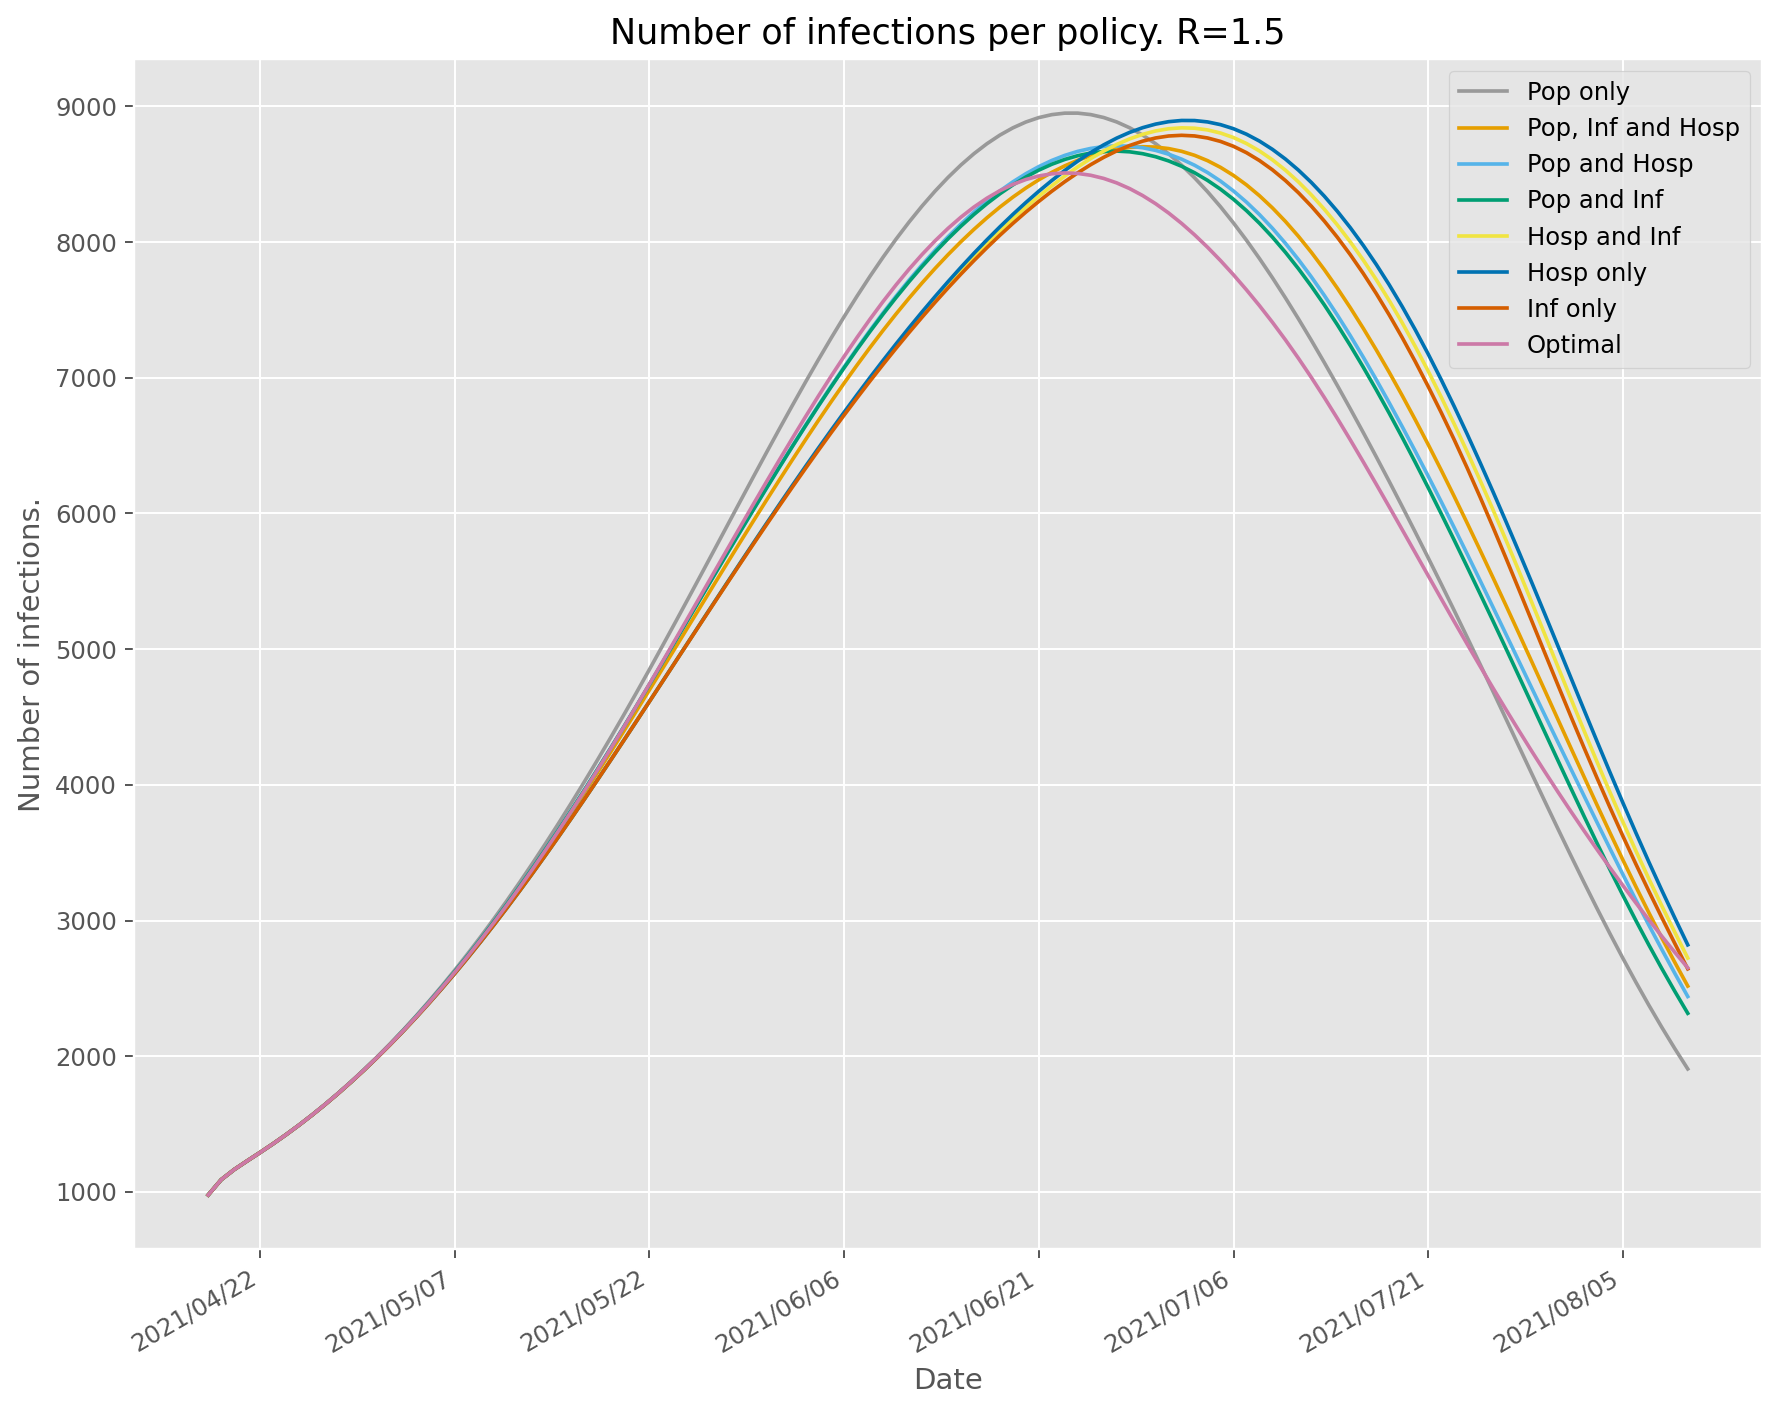

In [19]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='infections', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 1938374.032617979
Pop and Inf: 1953109.1991423257
Pop and Hosp: 1956456.6489938062
Pop, Inf and Hosp: 1958681.088274827
Inf only: 1958998.381305327
Hosp and Inf: 1962723.200059274
Hosp only: 1966279.5285560843


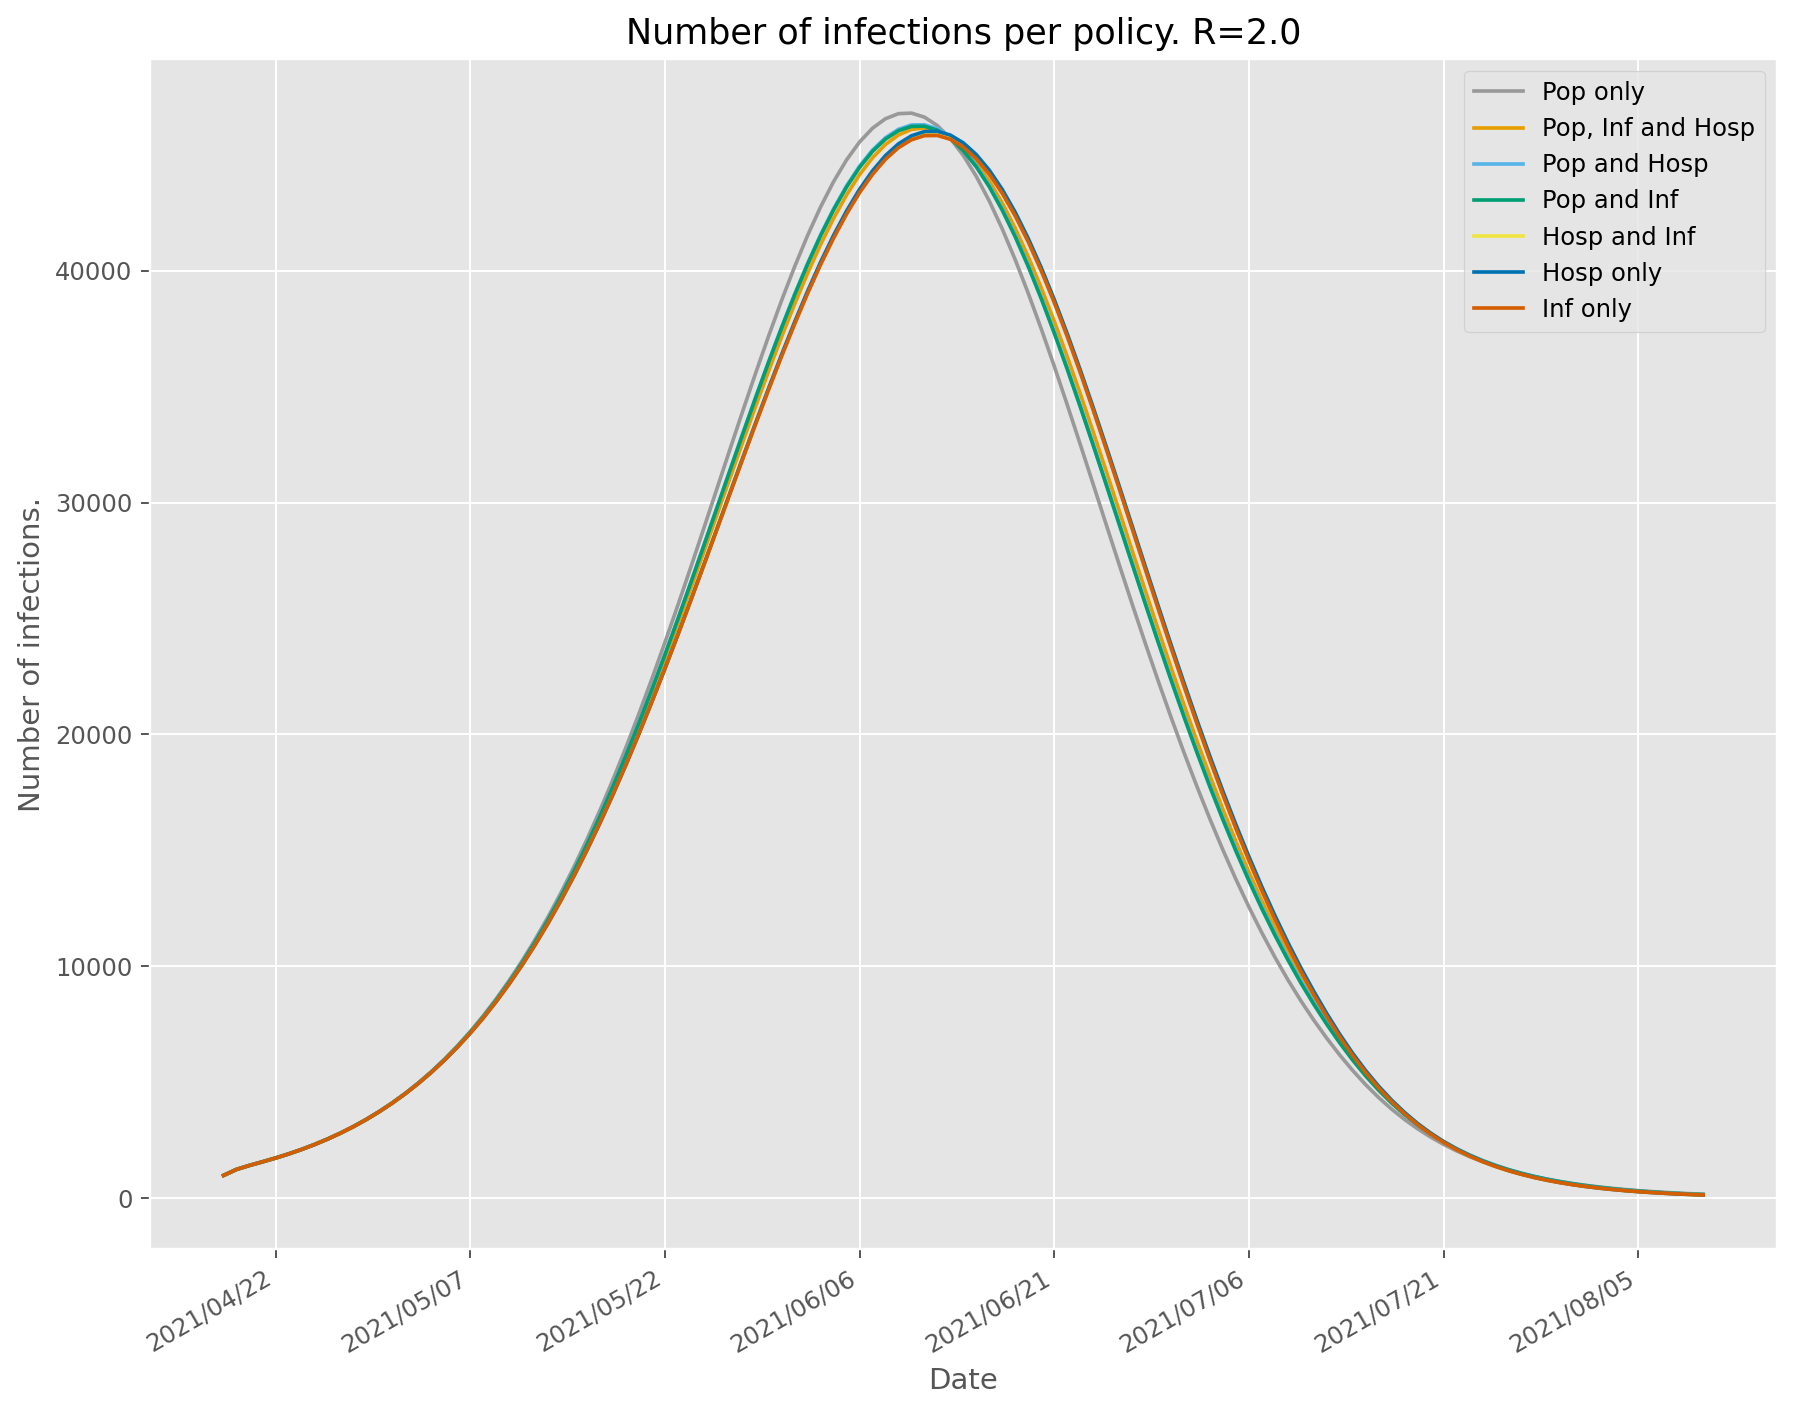

In [20]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[4], metric='infections', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()